# import necessary liberaries 

In [3]:
# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, classification_report
)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

# EXPLORATORY DATA ANALYSIS

In [4]:
# Load the dataset
data = pd.read_csv(r"C:\Users\temit\Downloads\customer_churn_dataset-testing-master.csv\customer_churn_dataset-testing-master.csv")

In [5]:
data.head()

CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           1   22  Female      25               14              4   
1           2   41  Female      28               28              7   
2           3   47    Male      27               10              2   
3           4   35    Male       9               12              5   
4           5   53  Female      58               24              9   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0             27             Basic         Monthly          598   
1             13          Standard         Monthly          584   
2             29           Premium          Annual          757   
3             17           Premium       Quarterly          232   
4              2          Standard          Annual          533   

   Last Interaction  Churn  
0                 9      1  
1                20      0  
2                21      0  
3                18      0  
4                18      0

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [9]:
data.shape

(64374, 12)

In [11]:
data.dtypes

CustomerID            int64
Age                   int64
Gender               object
Tenure                int64
Usage Frequency       int64
Support Calls         int64
Payment Delay         int64
Subscription Type    object
Contract Length      object
Total Spend           int64
Last Interaction      int64
Churn                 int64
dtype: object

In [13]:
data.describe()

CustomerID           Age        Tenure  Usage Frequency  \
count  64374.000000  64374.000000  64374.000000     64374.000000   
mean   32187.500000     41.970982     31.994827        15.080234   
std    18583.317451     13.924911     17.098234         8.816470   
min        1.000000     18.000000      1.000000         1.000000   
25%    16094.250000     30.000000     18.000000         7.000000   
50%    32187.500000     42.000000     33.000000        15.000000   
75%    48280.750000     54.000000     47.000000        23.000000   
max    64374.000000     65.000000     60.000000        30.000000   

       Support Calls  Payment Delay   Total Spend  Last Interaction  \
count   64374.000000   64374.000000  64374.000000      64374.000000   
mean        5.400690      17.133952    541.023379         15.498850   
std         3.114005       8.852211    260.874809          8.638436   
min         0.000000       0.000000    100.000000          1.000000   
25%         3.000000      10.000000    313.000000          8.000000   
50%         6.000000      19.000000    534.000000         15.000000   
75%         8.000000      25.000000    768.000000         23.000000   
max        10.000000      30.000000   1000.000000         30.000000   

              Churn  
count  64374.000000  
mean       0.473685  
std        0.499311  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

In [15]:
# Summary of missing values
missing_values = data.isnull().sum()
print(missing_values)

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


In [25]:
# Check for duplicate rows
duplicates = data.duplicated().sum()

print(duplicates)

0


In [17]:
data['Churn'].value_counts(normalize=True) * 100

Churn
0    52.631497
1    47.368503
Name: proportion, dtype: float64

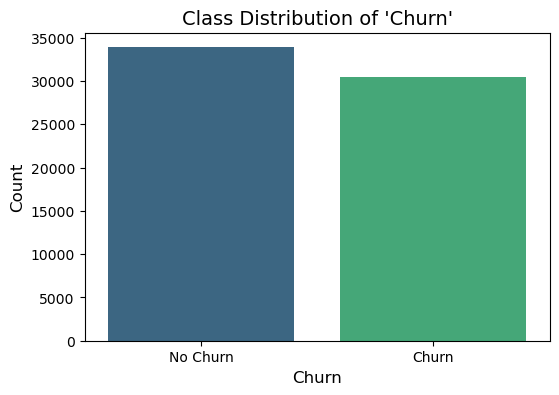

In [19]:
# Calculate value counts and percentage distribution of the target variable 'Churn'
class_counts = data['Churn'].value_counts()
class_percentages = data['Churn'].value_counts(normalize=True) * 100

# Visualize the class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title("Class Distribution of 'Churn'", fontsize=14)
plt.xlabel("Churn", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()

# Display the value counts and percentages
imbalance_info = pd.DataFrame({
    'Class': class_counts.index,
    'Count': class_counts.values,
    'Percentage': class_percentages.values
})

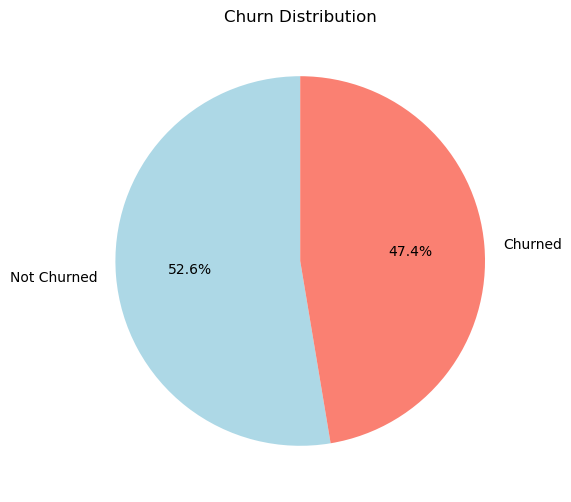

In [21]:
churn_distribution = data['Churn'].value_counts()
plt.figure(figsize=(8, 6))
churn_distribution.plot.pie(autopct='%1.1f%%', labels=['Not Churned', 'Churned'], startangle=90, colors=['lightblue', 'salmon'])
plt.title('Churn Distribution')
plt.ylabel('')
plt.show()

# comment
The churn distribution is fairly balanced (around 47% churned, 53% non-churned).

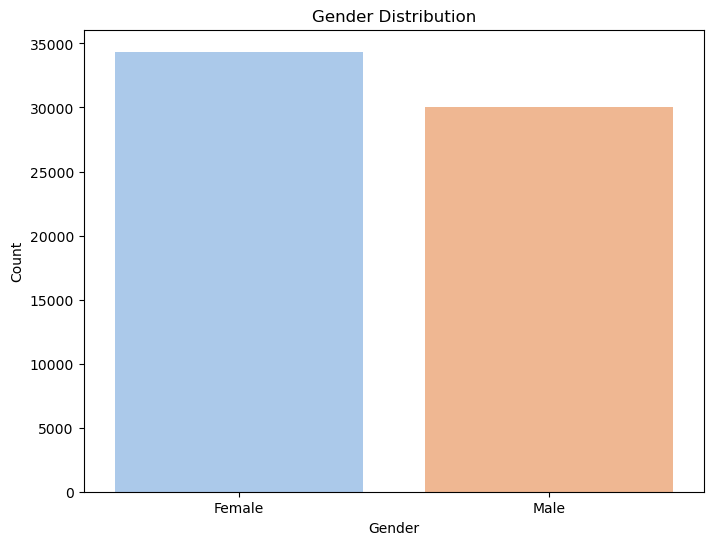

In [22]:
# Gender Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Gender', palette='pastel')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

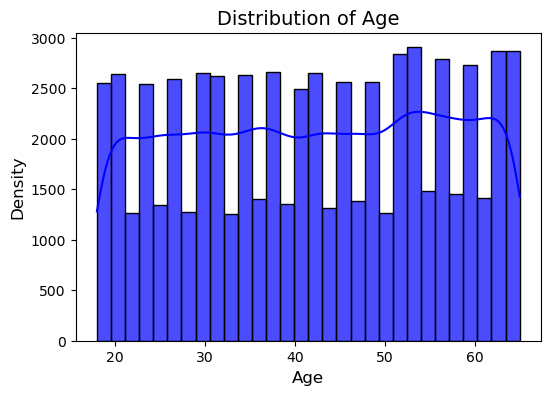

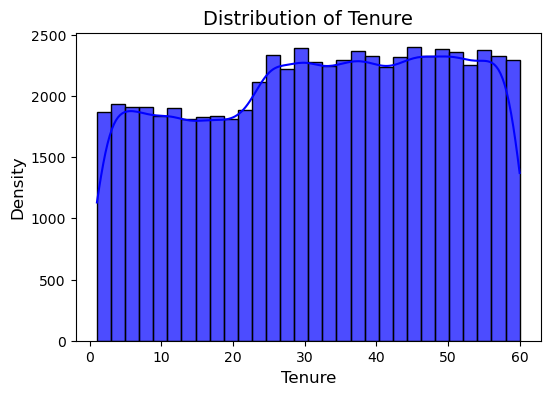

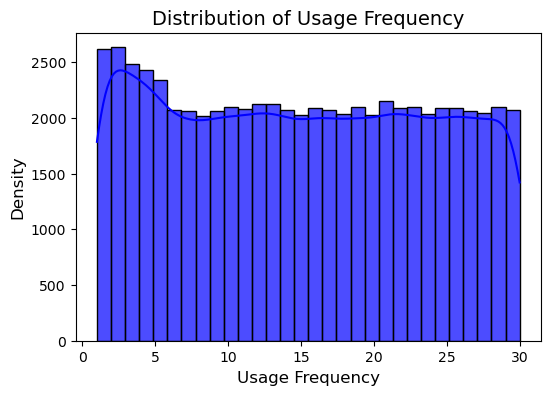

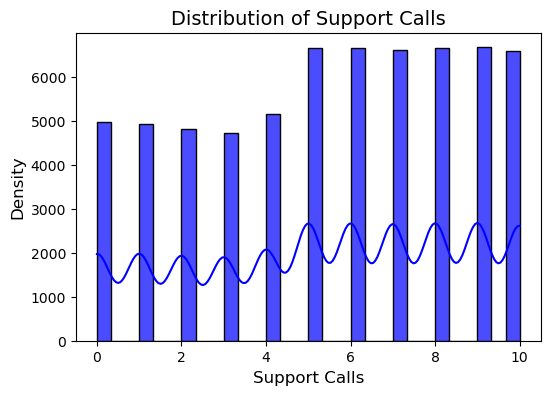

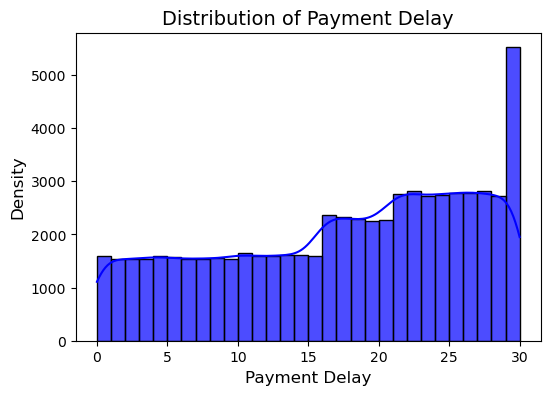

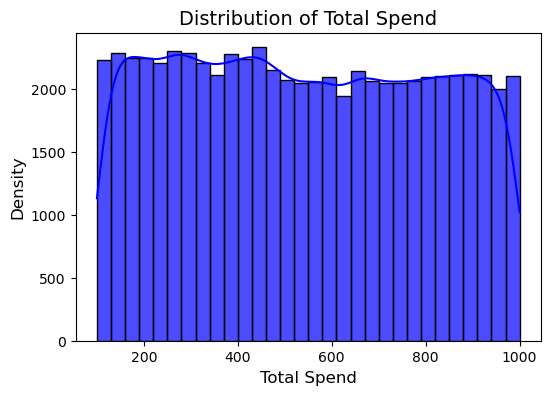

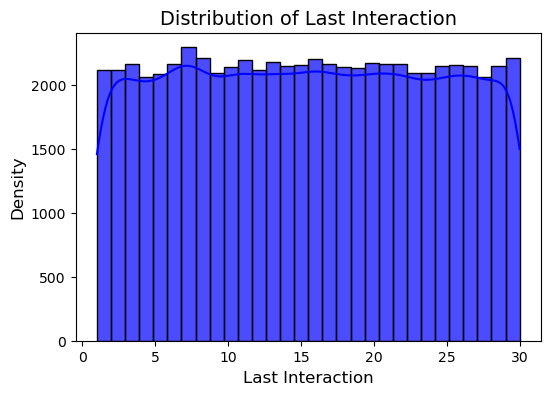

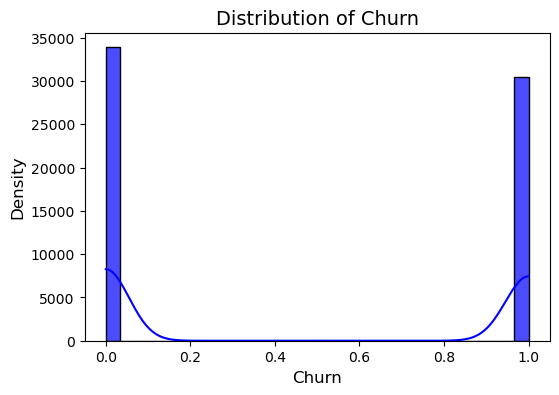

In [38]:
# Statistical summary for numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_summary = data[numerical_columns].describe()

# Distribution plots for numerical variables
for col in numerical_columns:
    if col != "CustomerID":
        plt.figure(figsize=(6, 4))
        sns.histplot(data[col], kde=True, bins=30, color="blue", alpha=0.7)
        plt.title(f"Distribution of {col}", fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel("Density", fontsize=12)
        plt.show()

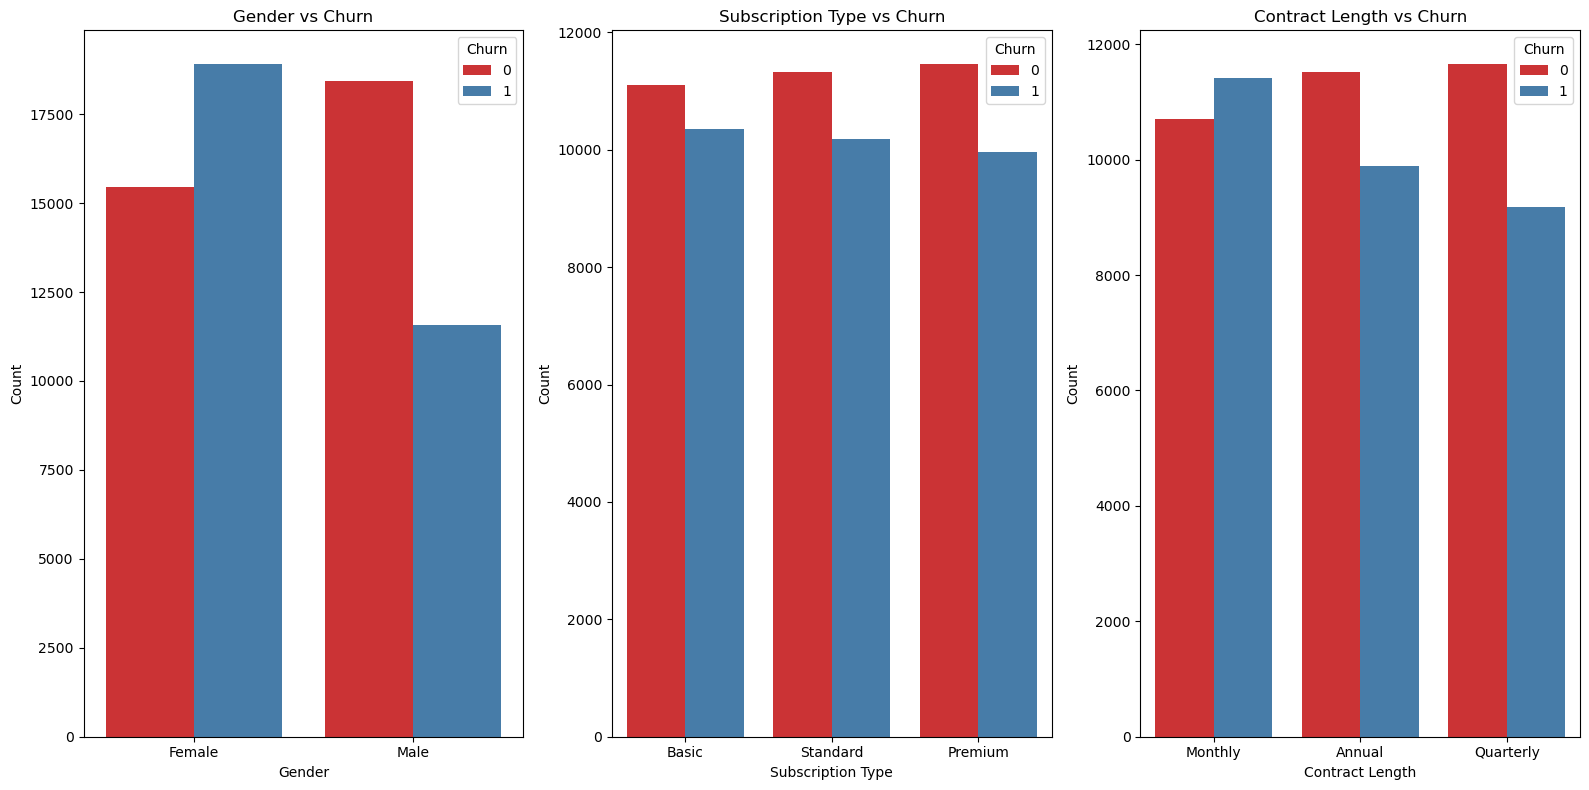

In [40]:
# Visualize categorical features
categorical_features = ['Gender', 'Subscription Type', 'Contract Length']

plt.figure(figsize=(16, 8))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=feature, hue='Churn', data=data, palette='Set1')
    plt.title(f'{feature} vs Churn')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Churn', loc='upper right')

plt.tight_layout()
plt.show()

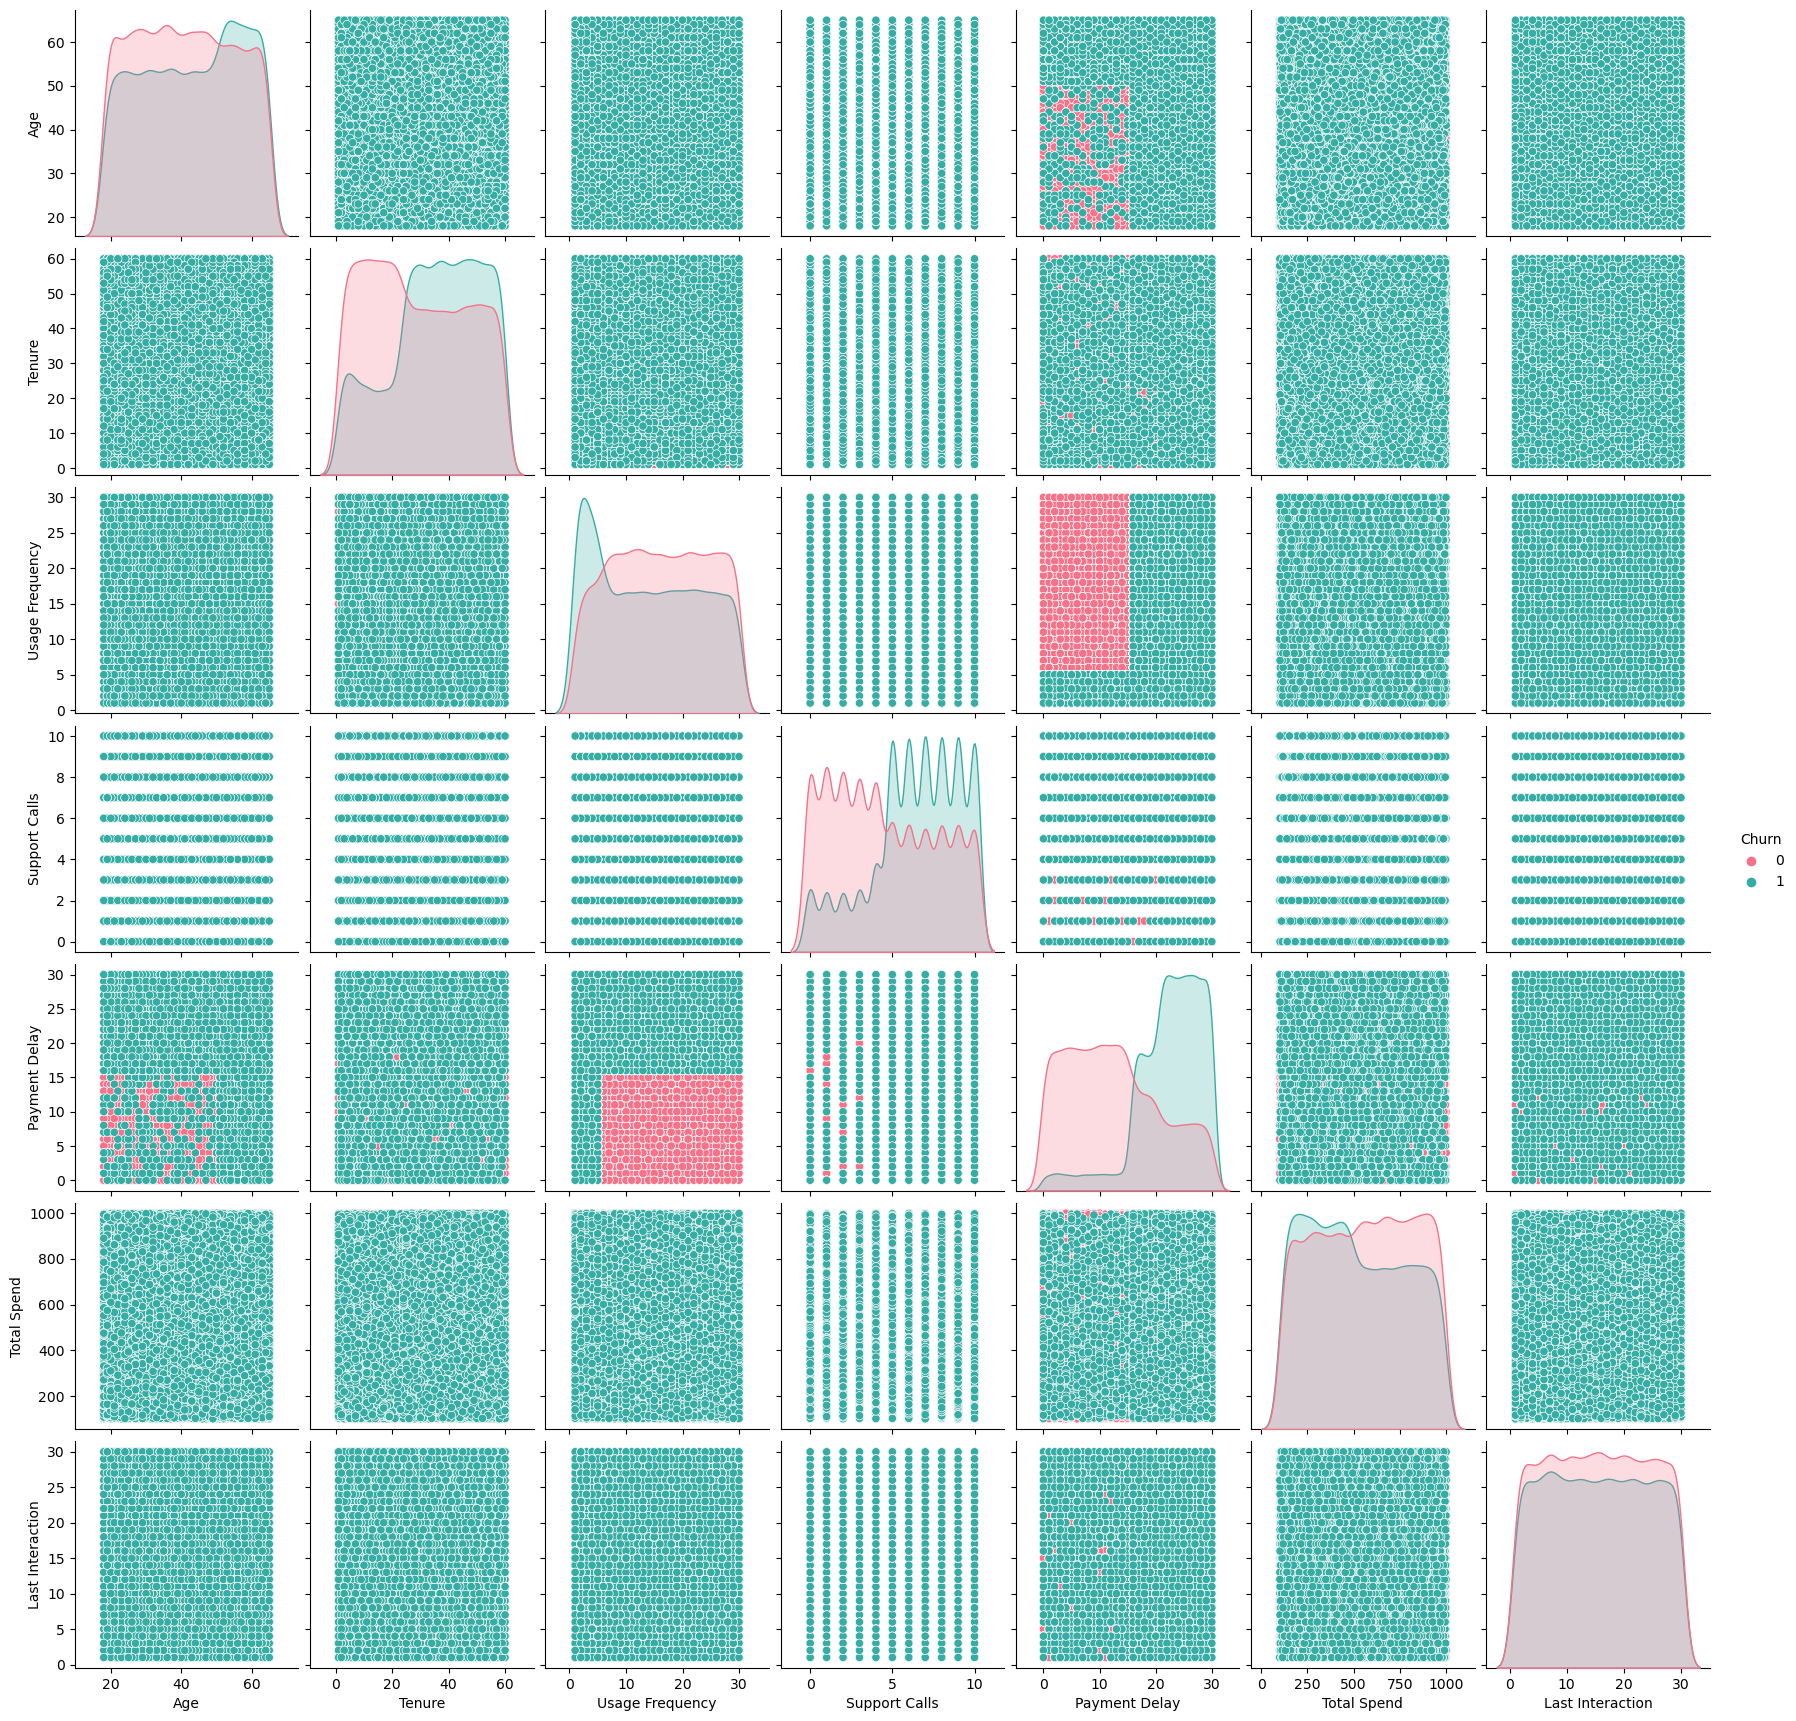

In [42]:
# Pairplot for numerical variables
numerical_columns = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']
sns.pairplot(data[numerical_columns + ['Churn']], hue='Churn', palette='husl', diag_kind='kde')
plt.show()

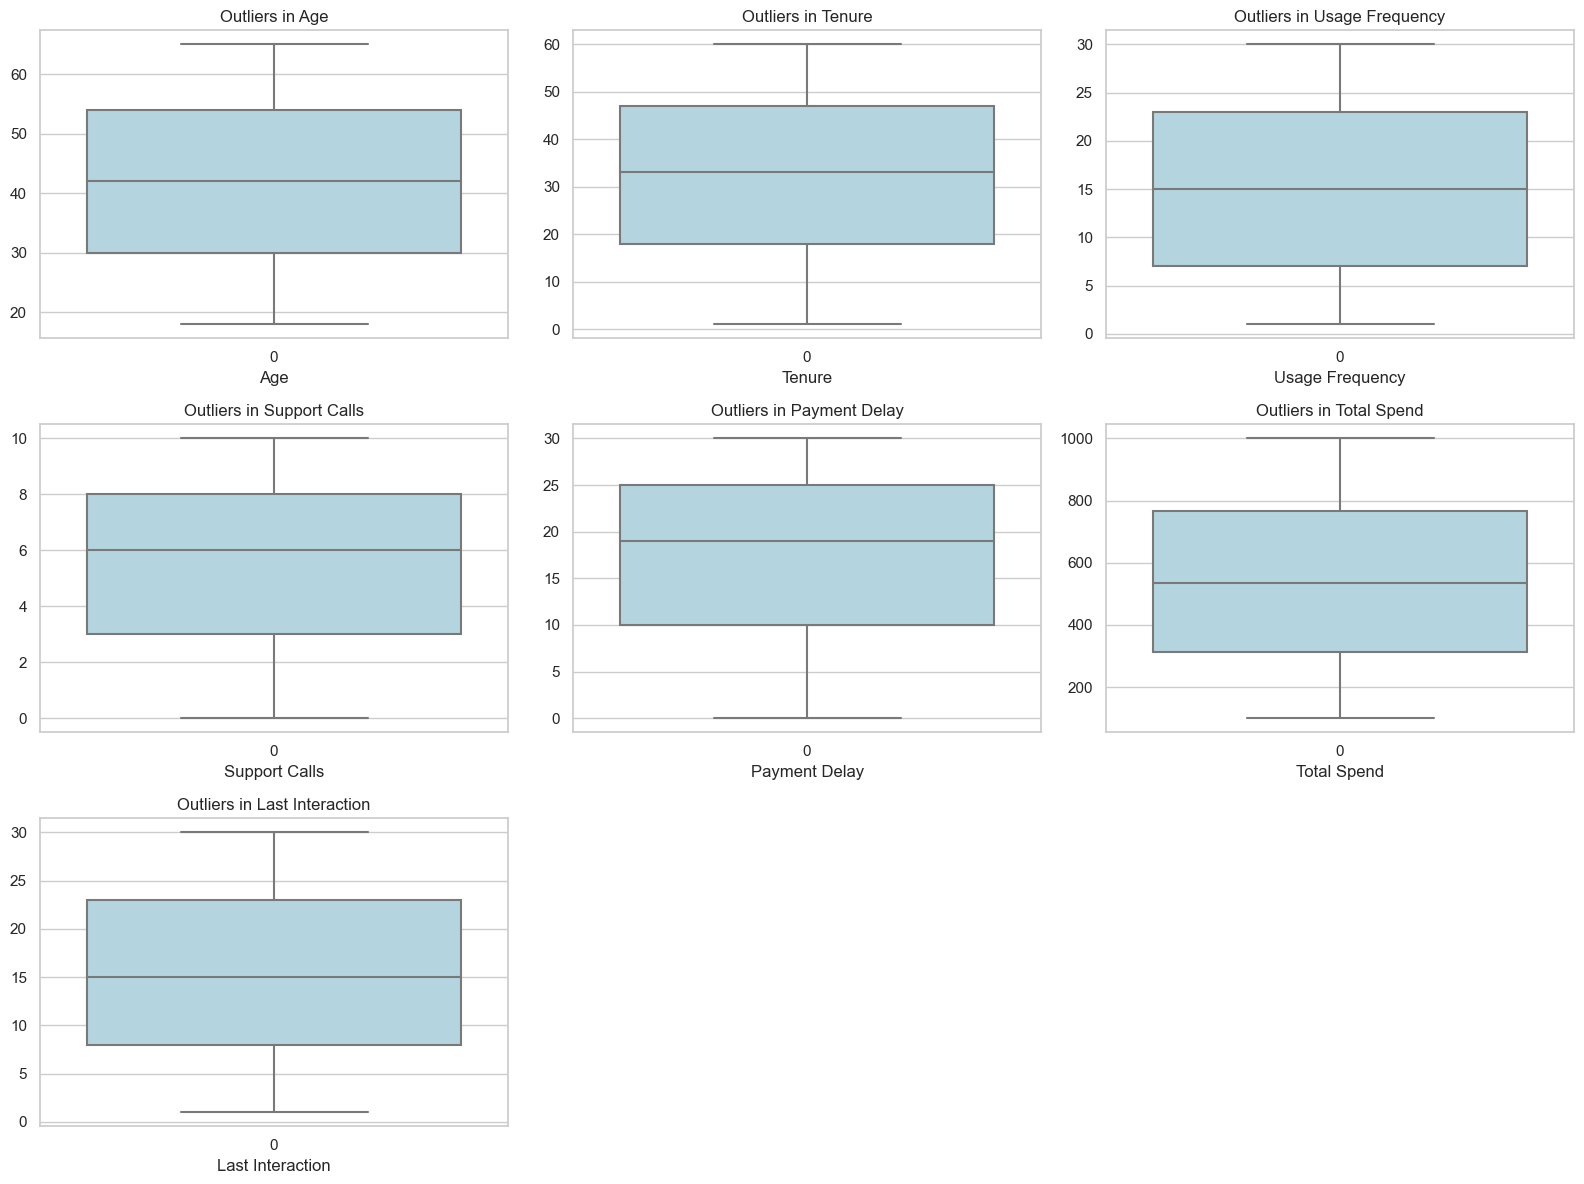

In [47]:
# Redefine numerical_features and retry outlier visualization

numerical_features = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 
                      'Payment Delay', 'Total Spend', 'Last Interaction']

# Check for outliers using boxplots for numerical features
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data[feature], color='lightblue')
    plt.title(f'Outliers in {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

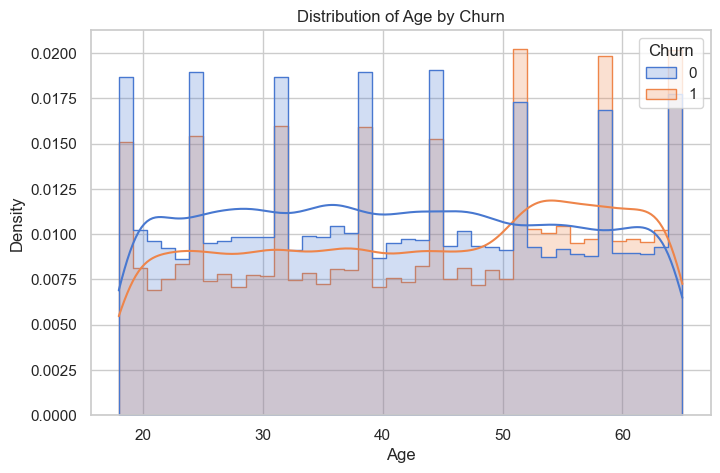

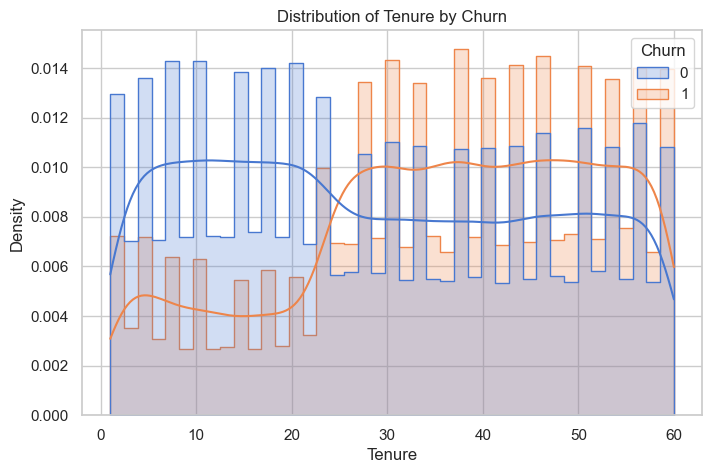

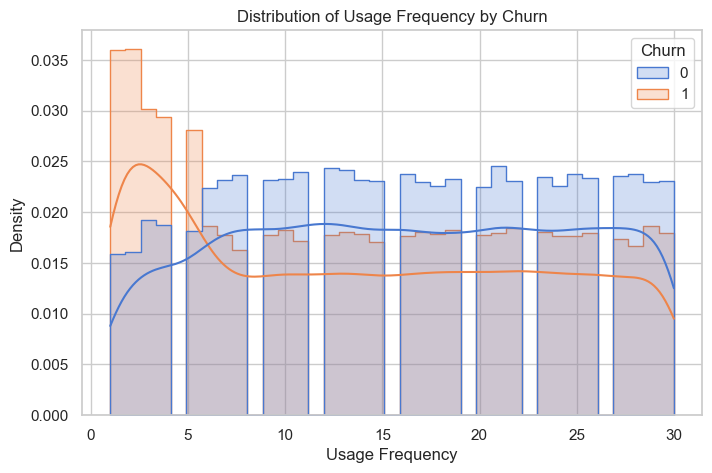

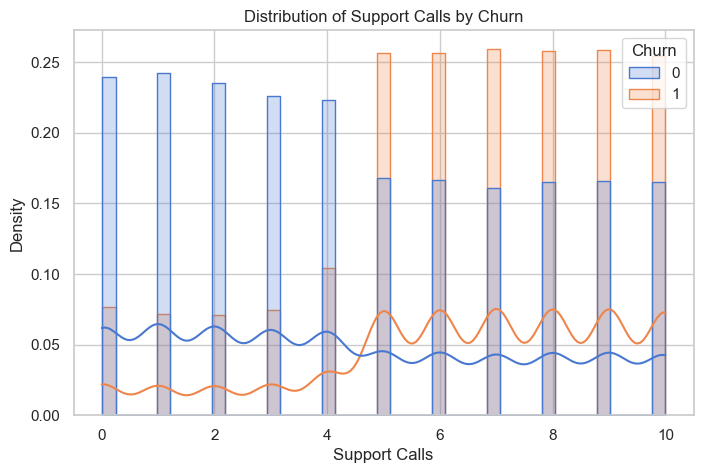

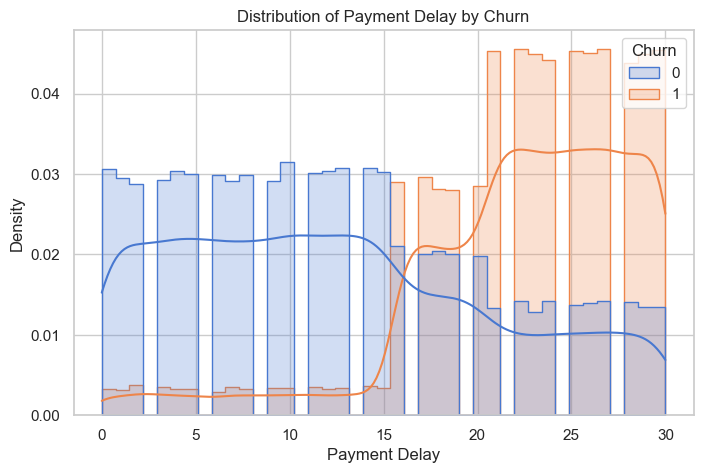

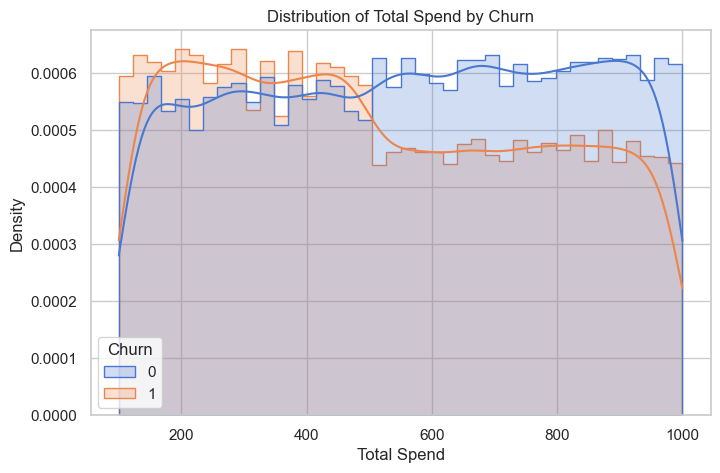

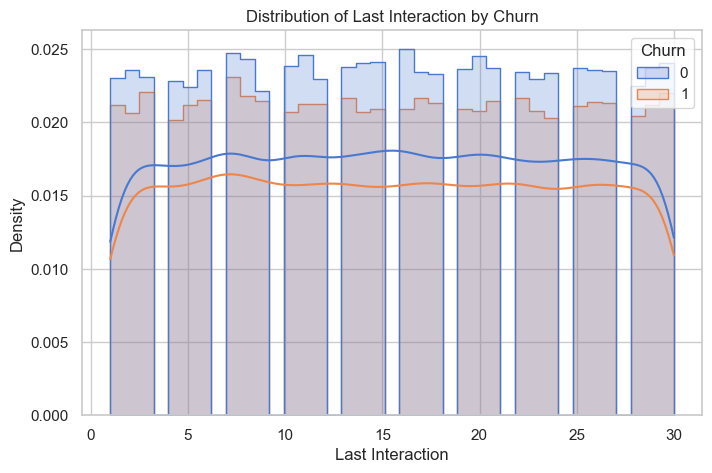

In [65]:
# Visualizing distributions and relationships with Churn
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=data, x=col, hue='Churn', kde=True, palette='muted', element="step", stat="density")
    plt.title(f"Distribution of {col} by Churn")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()

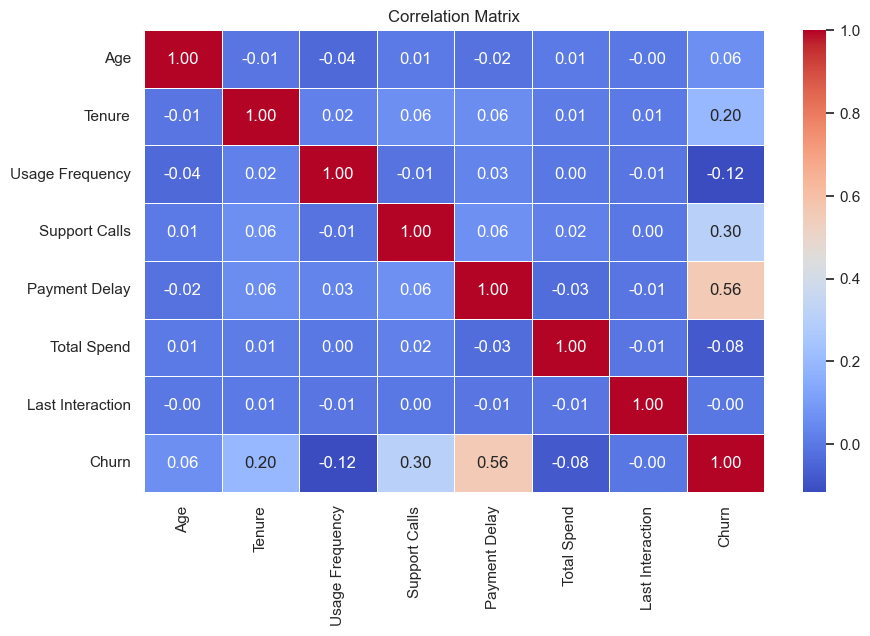

In [67]:
# Correlation matrix to check relationships between numeric features and Churn
plt.figure(figsize=(10, 6))
correlation_matrix = data[numeric_cols + ['Churn']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [69]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Initializing scalers and encoders
scaler = MinMaxScaler()
encoder = LabelEncoder()

In [71]:
# Normalize numerical features if needed (Min-Max scaling)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = data.copy()

# Apply normalization to numerical features only
normalized_features = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls',
                        'Payment Delay', 'Total Spend', 'Last Interaction']
normalized_data[normalized_features] = scaler.fit_transform(data[normalized_features])

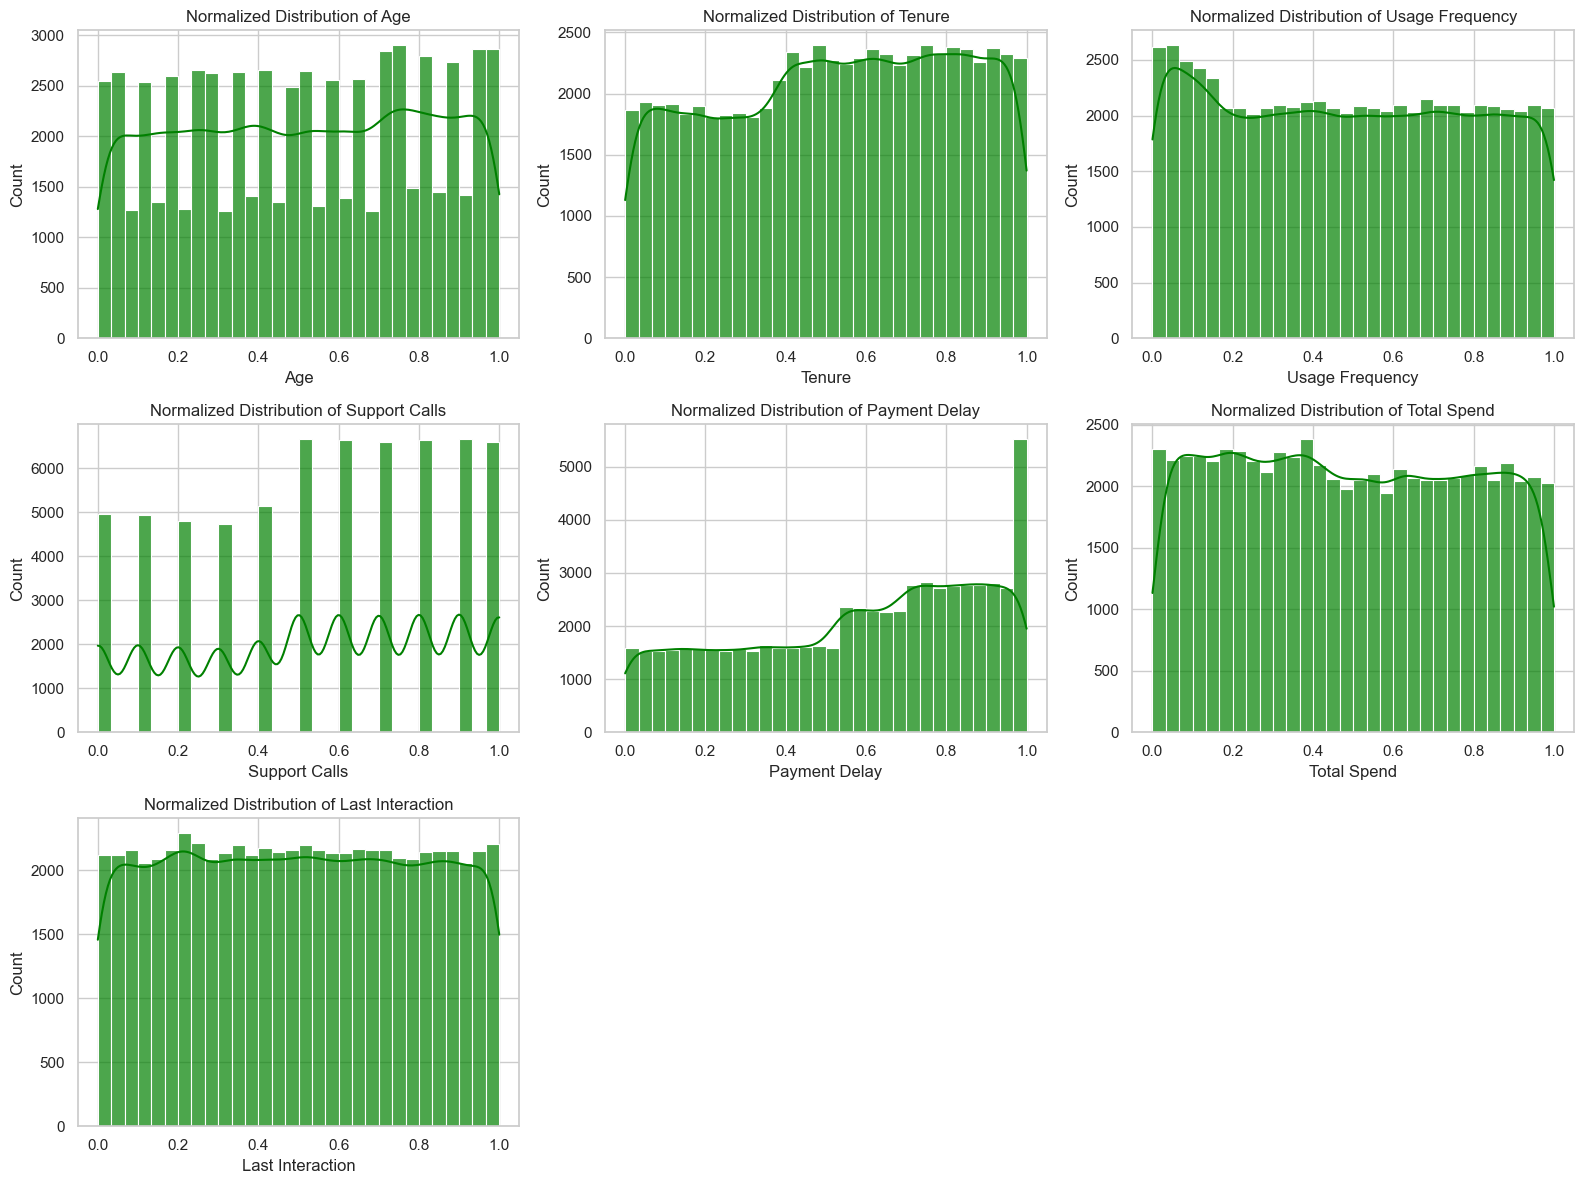

In [73]:
# Check the normalized data distribution
plt.figure(figsize=(16, 12))
for i, feature in enumerate(normalized_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(normalized_data[feature], kde=True, bins=30, color='green', alpha=0.7)
    plt.title(f'Normalized Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [74]:
# Encoding categorical columns
categorical_cols = ['Gender', 'Subscription Type', 'Contract Length']
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

In [75]:
# Displaying a sample of the preprocessed dataset
preprocessed_sample = data.head()

print(preprocessed_sample)

   CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           1   22       0      25               14              4   
1           2   41       0      28               28              7   
2           3   47       1      27               10              2   
3           4   35       1       9               12              5   
4           5   53       0      58               24              9   

   Payment Delay  Subscription Type  Contract Length  Total Spend  \
0             27                  0                1          598   
1             13                  2                1          584   
2             29                  1                0          757   
3             17                  1                2          232   
4              2                  2                0          533   

   Last Interaction  Churn  
0                 9      1  
1                20      0  
2                21      0  
3                18      0  
4                18

In [76]:
# Checking for any missing values after preprocessing
missing_values_after_preprocessing = data.isnull().sum().to_dict()

In [77]:
# Output summary
preprocessing_summary = {
    "Sample Data After Normalization and Encoding": preprocessed_sample,
    "Missing Values After Preprocessing": missing_values_after_preprocessing
}

print(preprocessing_summary)

{'Sample Data After Normalization and Encoding':    CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           1   22       0      25               14              4   
1           2   41       0      28               28              7   
2           3   47       1      27               10              2   
3           4   35       1       9               12              5   
4           5   53       0      58               24              9   

   Payment Delay  Subscription Type  Contract Length  Total Spend  \
0             27                  0                1          598   
1             13                  2                1          584   
2             29                  1                0          757   
3             17                  1                2          232   
4              2                  2                0          533   

   Last Interaction  Churn  
0                 9      1  
1                20      0  
2                21      0  

# cusomer segmentation

In [88]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Preparing the data for clustering (exclude 'CustomerID' and 'Churn')
clustering_features = data.drop(columns=['CustomerID', 'Churn'])

# Encoding categorical variables
categorical_cols = ['Gender', 'Subscription Type', 'Contract Length']
for col in categorical_cols:
    encoder = LabelEncoder()
    clustering_features[col] = encoder.fit_transform(clustering_features[col])

# Normalizing numeric features
scaler = StandardScaler()
clustering_features = pd.DataFrame(scaler.fit_transform(clustering_features), columns=clustering_features.columns)

# Confirming the processed features
clustering_features.head()

Age    Gender    Tenure  Usage Frequency  Support Calls  \
0 -1.434202 -0.934825 -0.409100        -0.122526      -0.449807   
1 -0.069730 -0.934825 -0.233642         1.465424       0.513590   
2  0.361155  1.069719 -0.292128        -0.576225      -1.092072   
3 -0.500616  1.069719 -1.344876        -0.349375      -0.128674   
4  0.792041 -0.934825  1.520939         1.011724       1.155855   

   Payment Delay  Subscription Type  Contract Length  Total Spend  \
0       1.114538          -1.225188         0.011046     0.218408   
1      -0.467000           1.223248         0.011046     0.164742   
2       1.340472          -0.000970        -1.223477     0.827900   
3      -0.015132          -0.000970         1.245569    -1.184575   
4      -1.709637           1.223248        -1.223477    -0.030756   

   Last Interaction  
0         -0.752324  
1          0.521065  
2          0.636827  
3          0.289540  
4          0.289540

In [90]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Finding the optimal number of clusters using the Elbow Method and Silhouette Scores
inertia = []
silhouette_scores = []

for k in range(2, 11):  # Testing cluster sizes from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(clustering_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(clustering_features, kmeans.labels_))

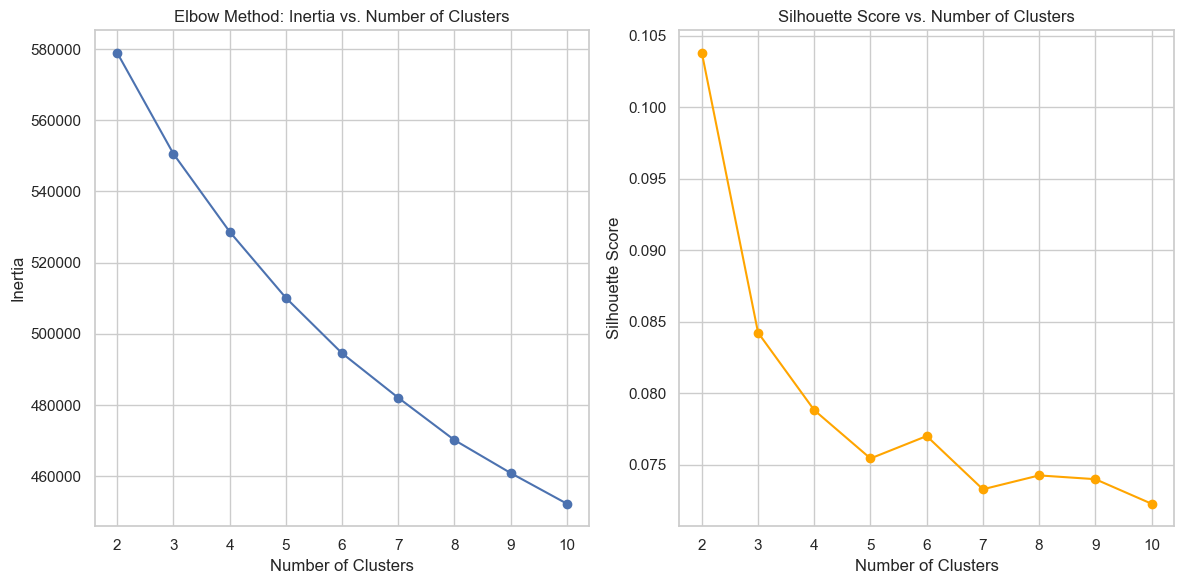

In [91]:
# Plotting the Elbow Method and Silhouette Score
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title("Elbow Method: Inertia vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

In [94]:
# Choosing an optimal number of clusters based on analysis (example: 4)
optimal_clusters = 4

# Performing K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
clustering_features['Cluster'] = kmeans.fit_predict(clustering_features)

# Adding cluster labels back to the original dataset
data['Cluster'] = clustering_features['Cluster']

# Analyzing cluster characteristics
cluster_summary = data.groupby('Cluster').mean()

print(cluster_summary)

           CustomerID        Age    Gender     Tenure  Usage Frequency  \
Cluster                                                                  
0        35222.088839  41.212337  1.000000  39.197698        15.745495   
1        35639.561130  41.650475  0.000000  45.057366        15.506676   
2        31475.946075  42.280832  0.000000  16.275570        14.722202   
3        25076.173730  42.893725  0.999858  24.946008        14.181922   

         Support Calls  Payment Delay  Subscription Type  Contract Length  \
Cluster                                                                     
0             6.796359      22.004067           0.999374         0.982545   
1             5.811363      18.674213           0.999670         0.973900   
2             4.719354      16.431402           0.991580         1.024827   
3             4.063181      10.400741           1.014460         0.984116   

         Total Spend  Last Interaction     Churn  
Cluster                                  

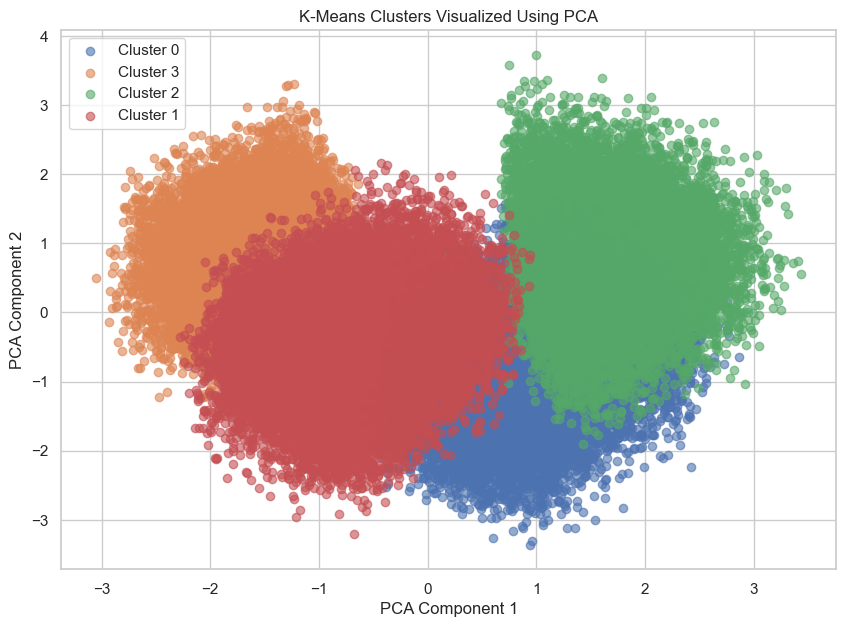

In [100]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(clustering_features_scaled.drop(columns=['KMeans_Cluster']))

# Add PCA results to the dataframe
clustering_features_scaled['PCA1'] = pca_result[:, 0]
clustering_features_scaled['PCA2'] = pca_result[:, 1]

# Plotting the K-Means clusters
plt.figure(figsize=(10, 7))
for cluster in clustering_features_scaled['KMeans_Cluster'].unique():
    cluster_data = clustering_features_scaled[clustering_features_scaled['KMeans_Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f"Cluster {cluster}", alpha=0.6)

plt.title("K-Means Clusters Visualized Using PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

In [108]:
from sklearn.cluster import DBSCAN


# Step 4: DBSCAN Clustering on Sampled Data
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels_sample = dbscan.fit_predict(sampled_features)

In [110]:
# Count unique clusters in DBSCAN
dbscan_cluster_counts_sample = np.unique(dbscan_labels_sample, return_counts=True)

# Display results
dbscan_results = {
    "DBSCAN Unique Clusters": np.unique(dbscan_labels_sample).tolist(),
    "DBSCAN Cluster Counts": dict(zip(dbscan_cluster_counts_sample[0], dbscan_cluster_counts_sample[1]))
}
dbscan_results

{'DBSCAN Unique Clusters': [-1,
  0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16],
 'DBSCAN Cluster Counts': {-1: 1888,
  0: 7,
  1: 14,
  2: 11,
  3: 5,
  4: 5,
  5: 5,
  6: 6,
  7: 5,
  8: 5,
  9: 5,
  10: 15,
  11: 5,
  12: 5,
  13: 5,
  14: 4,
  15: 5,
  16: 5}}

In [112]:
# Step 5: Refine DBSCAN Parameters
# Exploring refined parameters for better clustering
refined_dbscan = DBSCAN(eps=1.2, min_samples=10)  # Adjusted parameters
refined_dbscan_labels = refined_dbscan.fit_predict(sampled_features)

In [114]:
# Count unique clusters in refined DBSCAN
refined_dbscan_cluster_counts = np.unique(refined_dbscan_labels, return_counts=True)

# Step 6: Visualize DBSCAN clusters in 2D space using PCA
pca = PCA(n_components=2)
pca_sampled_features = pca.fit_transform(sampled_features)

In [116]:
# Add DBSCAN cluster labels to PCA-transformed data
dbscan_visualization_data = pd.DataFrame(pca_sampled_features, columns=['PCA1', 'PCA2'])
dbscan_visualization_data['Cluster'] = refined_dbscan_labels

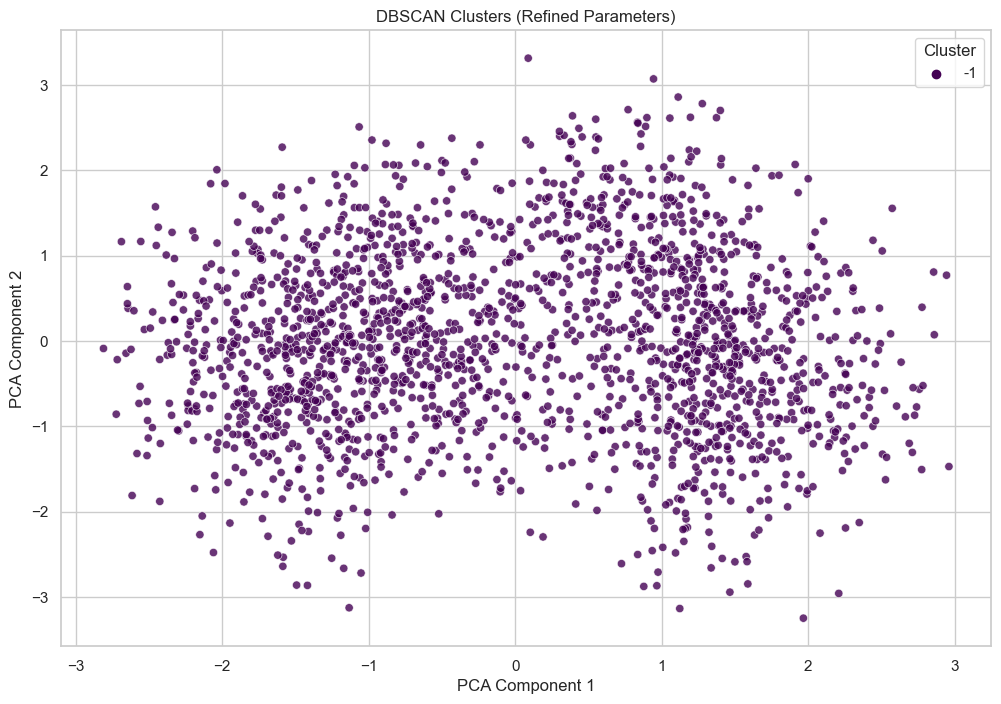

In [118]:
# Plot the DBSCAN clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=dbscan_visualization_data, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', alpha=0.8)
plt.title("DBSCAN Clusters (Refined Parameters)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

In [120]:
# Output refined DBSCAN cluster results
refined_dbscan_results = {
    "Refined DBSCAN Unique Clusters": np.unique(refined_dbscan_labels).tolist(),
    "Refined DBSCAN Cluster Counts": dict(zip(refined_dbscan_cluster_counts[0], refined_dbscan_cluster_counts[1]))
}
refined_dbscan_results

{'Refined DBSCAN Unique Clusters': [-1],
 'Refined DBSCAN Cluster Counts': {-1: 2000}}

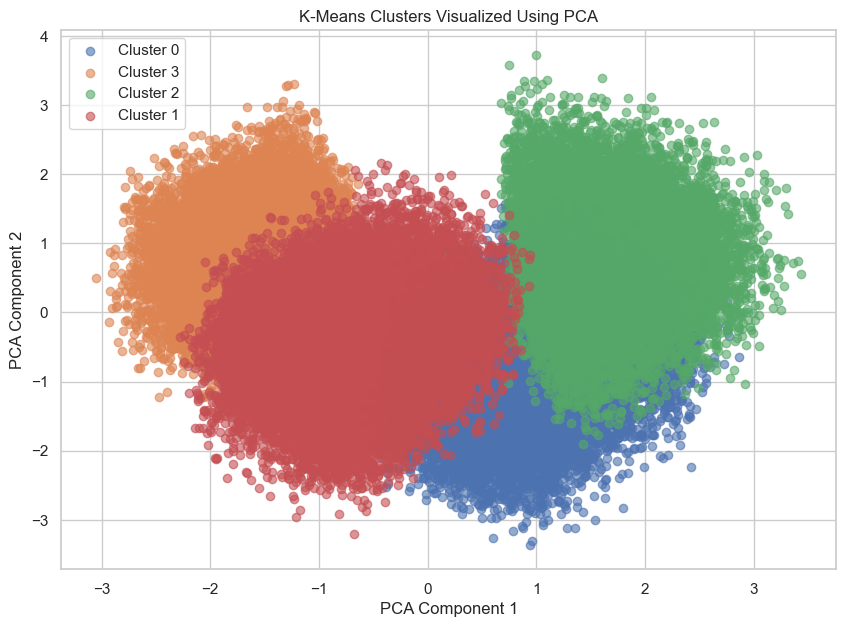

In [124]:
# Reloading necessary libraries due to reset
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Preparing the dataset for clustering (excluding 'CustomerID' and 'Churn')
clustering_features = data.drop(columns=['CustomerID', 'Churn'])

# Encoding categorical variables
categorical_cols = ['Gender', 'Subscription Type', 'Contract Length']
for col in categorical_cols:
    encoder = LabelEncoder()
    clustering_features[col] = encoder.fit_transform(clustering_features[col])

# Normalizing the features
scaler = StandardScaler()
clustering_features_scaled = pd.DataFrame(scaler.fit_transform(clustering_features), columns=clustering_features.columns)

# Performing K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clustering_features_scaled['KMeans_Cluster'] = kmeans.fit_predict(clustering_features_scaled)

# Adding the cluster labels back to the original dataset
data['KMeans_Cluster'] = clustering_features_scaled['KMeans_Cluster']

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(clustering_features_scaled.drop(columns=['KMeans_Cluster']))

# Add PCA results to the dataframe
clustering_features_scaled['PCA1'] = pca_result[:, 0]
clustering_features_scaled['PCA2'] = pca_result[:, 1]

# Plotting the K-Means clusters
plt.figure(figsize=(10, 7))
for cluster in clustering_features_scaled['KMeans_Cluster'].unique():
    cluster_data = clustering_features_scaled[clustering_features_scaled['KMeans_Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f"Cluster {cluster}", alpha=0.6)

plt.title("K-Means Clusters Visualized Using PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

In [159]:
# Reducing the sample size for hierarchical clustering to 1,000 rows
small_sampled_data = clustering_features_scaled.sample(n=1000, random_state=42)

# Performing hierarchical clustering on the smaller sample
linkage_matrix_small = linkage(small_sampled_data, method='ward')

# Assigning cluster labels (e.g., 4 clusters)
hierarchical_clusters_small = fcluster(linkage_matrix_small, t=4, criterion='maxclust')

# Adding the hierarchical cluster labels to the small sample
small_sampled_data['Hierarchical_Cluster'] = hierarchical_clusters_small

print(small_sampled_data)

            Age    Gender    Tenure  Usage Frequency  Support Calls  \
15476  0.935670  1.069719 -0.701530         1.011724      -0.449807   
34666 -1.003316  1.069719 -0.292128         1.692274      -0.449807   
50474  1.653813 -0.934825  1.637911         0.217749       0.513590   
7984   0.792041  1.069719  0.877593         0.104324       0.834723   
20227 -0.716059  1.069719  1.403967        -1.143350       0.513590   
...         ...       ...       ...              ...            ...   
16180 -0.931502 -0.934825  0.409705         1.692274      -1.413204   
20624  0.432970 -0.934825 -1.812764         1.125149      -0.128674   
1003   0.432970  1.069719  1.403967        -1.029925      -1.092072   
10925 -1.506016  1.069719 -0.467586        -0.122526       0.192458   
51328  1.007484 -0.934825  0.643649         1.578849       0.834723   

       Payment Delay  Subscription Type  Contract Length  Total Spend  \
15476      -1.257769           1.223248         0.011046     0.360239   
3

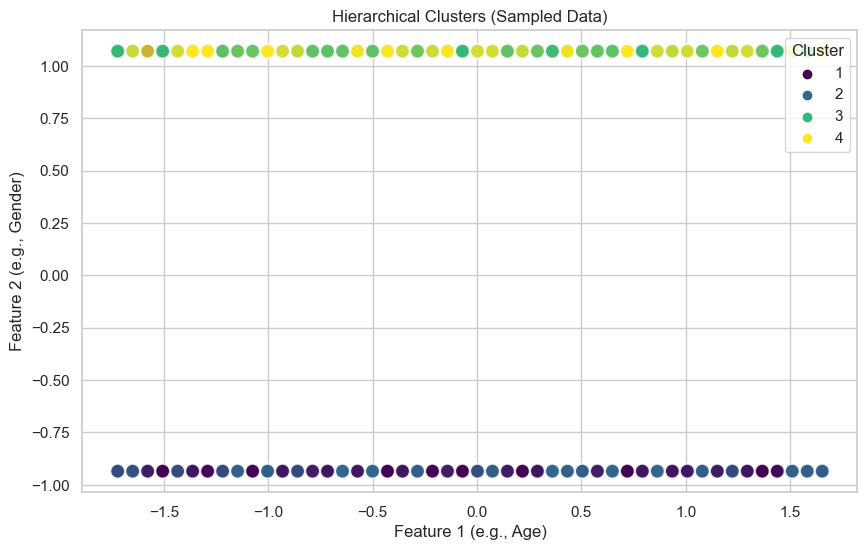

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the clusters from the smaller sample using the first two features
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=small_sampled_data.iloc[:, 0],  # First feature (e.g., Age)
    y=small_sampled_data.iloc[:, 1],  # Second feature (e.g., Gender)
    hue=small_sampled_data['Hierarchical_Cluster'],
    palette='viridis',
    s=100,
    alpha=0.7
)
plt.title("Hierarchical Clusters (Sampled Data)")
plt.xlabel("Feature 1 (e.g., Age)")
plt.ylabel("Feature 2 (e.g., Gender)")
plt.legend(title="Cluster", loc="upper right")
plt.show()

In [163]:
# Analyzing the characteristics of hierarchical clusters in the sampled data
cluster_summary = small_sampled_data.groupby('Hierarchical_Cluster').mean()

print(cluster_summary)

                           Age    Gender    Tenure  Usage Frequency  \
Hierarchical_Cluster                                                  
1                    -0.090143 -0.921095  0.752609        -0.000943   
2                     0.018678 -0.934825 -0.859046        -0.023561   
3                     0.062292  1.069719 -0.367155        -0.057220   
4                    -0.025921  1.069719  0.473159        -0.050266   

                      Support Calls  Payment Delay  Subscription Type  \
Hierarchical_Cluster                                                    
1                          0.152866       0.136135           0.066111   
2                         -0.278366      -0.173106          -0.157045   
3                         -0.423857      -0.812748           0.011396   
4                          0.486313       0.577618           0.107744   

                      Contract Length  Total Spend  Last Interaction  \
Hierarchical_Cluster                                          

In [165]:
# Adding the hierarchical cluster labels to the original dataset for integration with model training
# Matching the sampled data indices to the original dataset
data['Hierarchical_Cluster'] = None
data.loc[small_sampled_data.index, 'Hierarchical_Cluster'] = small_sampled_data['Hierarchical_Cluster']

# Confirming the addition of hierarchical clusters to the dataset
missing_values_after_integration = data['Hierarchical_Cluster'].isnull().sum()

# Displaying the updated dataset and missing value count for verification


print(missing_values_after_integration)

63374


In [167]:
# Identifying the most common cluster from the sampled data
most_common_cluster = small_sampled_data['Hierarchical_Cluster'].mode()[0]

# Imputing missing values in the Hierarchical_Cluster column
data['Hierarchical_Cluster'].fillna(most_common_cluster, inplace=True)

# Verifying that the Hierarchical_Cluster column is fully populated
missing_values_final = data['Hierarchical_Cluster'].isnull().sum()

# Displaying the updated dataset to confirm changes

print(missing_values_final)

0


In [134]:
from sklearn.cluster import DBSCAN

# Performing DBSCAN clustering on the full dataset
dbscan = DBSCAN(eps=1.5, min_samples=10)
clustering_features_scaled['DBSCAN_Cluster'] = dbscan.fit_predict(clustering_features_scaled)

# Adding the DBSCAN cluster labels back to the original dataset
data['DBSCAN_Cluster'] = clustering_features_scaled['DBSCAN_Cluster']

# Summarizing the DBSCAN results (excluding noise, cluster -1)
dbscan_summary = data[data['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster').mean()

# Returning the summary of DBSCAN clusters for user review
dbscan_summary

CustomerID        Age  Gender     Tenure  Usage Frequency  \
DBSCAN_Cluster                                                                
0               33722.688211  41.955459     0.0  31.521656        15.134472   
1               35296.631884  41.245369     1.0  39.248267        15.739824   
2               25077.955269  42.951361     1.0  24.862623        14.162565   

                Support Calls  Payment Delay  Subscription Type  \
DBSCAN_Cluster                                                    
0                    5.303132      17.673120           0.996052   
1                    6.812035      22.010208           0.998236   
2                    4.064490      10.420093           1.015851   

                Contract Length  Total Spend  Last Interaction     Churn  \
DBSCAN_Cluster                                                             
0                      0.997894   533.707689         15.504782  0.552686   
1                      0.982672   551.690737         15.640139  0.630750   
2                      0.983570   546.336783         15.329763  0.111537   

                 Cluster  KMeans_Cluster Hierarchical_Cluster  
DBSCAN_Cluster                                                 
0               1.469862        0.530138             3.462223  
1               0.000000        3.000000                  1.0  
2               3.000000        2.000000                  2.0

In [138]:
# Summarizing and comparing cluster characteristics for each method

# K-Means Summary
kmeans_summary = data.groupby('KMeans_Cluster').mean()

# Hierarchical Clustering Summary
hierarchical_summary = data.groupby('Hierarchical_Cluster').mean()

# DBSCAN Summary (excluding noise, cluster -1)
dbscan_summary = data[data['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster').mean()


print(kmeans_summary)
print(hierarchical_summary)
print(dbscan_summary)

                  CustomerID        Age    Gender     Tenure  Usage Frequency  \
KMeans_Cluster                                                                  
0               31475.946075  42.280832  0.000000  16.275570        14.722202   
1               35639.561130  41.650475  0.000000  45.057366        15.506676   
2               25076.173730  42.893725  0.999858  24.946008        14.181922   
3               35222.088839  41.212337  1.000000  39.197698        15.745495   

                Support Calls  Payment Delay  Subscription Type  \
KMeans_Cluster                                                    
0                    4.719354      16.431402           0.991580   
1                    5.811363      18.674213           0.999670   
2                    4.063181      10.400741           1.014460   
3                    6.796359      22.004067           0.999374   

                Contract Length  Total Spend  Last Interaction     Churn  \
KMeans_Cluster                    

# classification 

In [212]:
# Reloading necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


# Splitting features and target variable
X = data.drop(columns=['CustomerID', 'Churn'])
y = data['Churn']

# Scaling numeric features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Confirming data split
X_train.shape, X_test.shape, y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

((42916, 14),
 (21458, 14),
 Churn
 0    0.526307
 1    0.473693
 Name: proportion, dtype: float64,
 Churn
 0    0.526331
 1    0.473669
 Name: proportion, dtype: float64)

# Perform K-Fold Cross-Validation

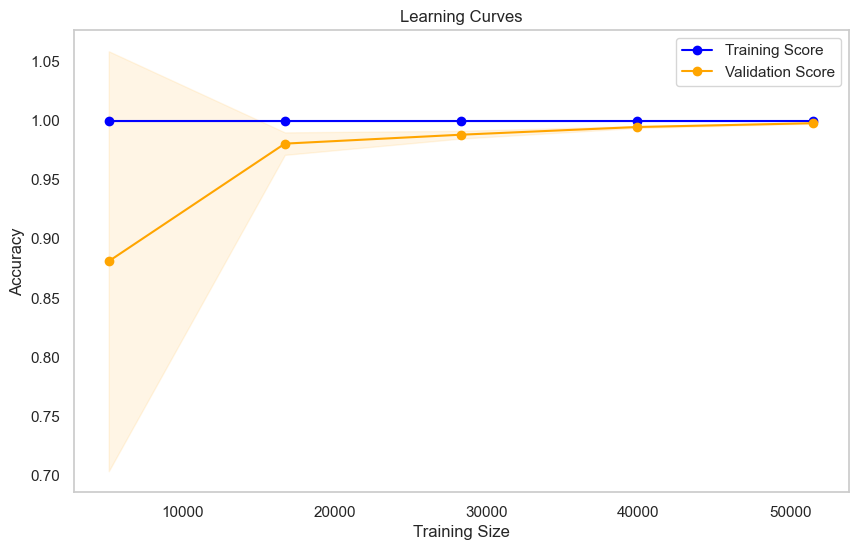

In [322]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X, y, cv=5, scoring='accuracy', n_jobs=-1)

# Calculate mean and standard deviation
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, test_mean, 'o-', color='orange', label='Validation Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='orange')
plt.title('Learning Curves')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

# comment
Cross-validation is used to assess model performance over different training set sizes.

the above code shows  A plot showing how the model's accuracy improves as the size of the training data increases.

# logistic regression

In [328]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Train Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log = log_reg.predict(X_test)

# Evaluation
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression:
Accuracy: 0.8116504854368932
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.79      0.81      6776
           1       0.78      0.84      0.81      6099

    accuracy                           0.81     12875
   macro avg       0.81      0.81      0.81     12875
weighted avg       0.81      0.81      0.81     12875



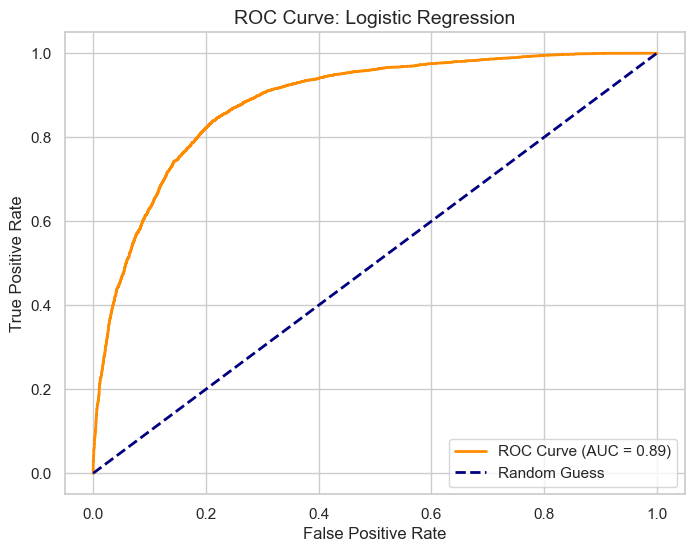

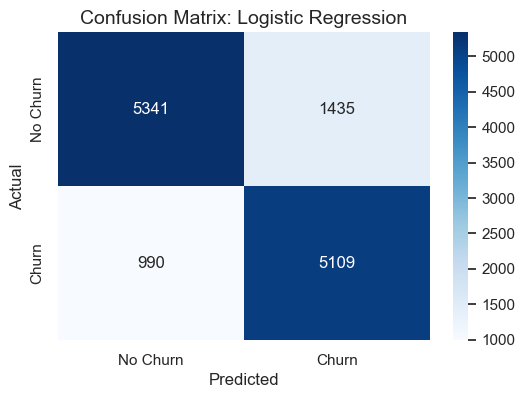

In [330]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Get predicted probabilities for the positive class
logistic_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Step 2: ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, logistic_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random Guess")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC Curve: Logistic Regression", fontsize=14)
plt.legend(loc="lower right")
plt.show()

# Step 3: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_log)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix: Logistic Regression", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

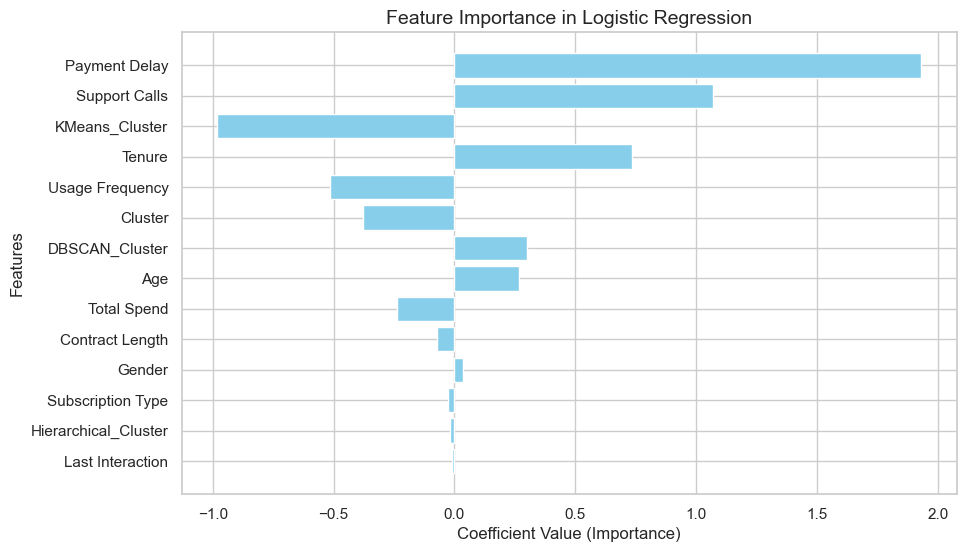

In [179]:
import numpy as np

# Extracting feature importance (coefficients) from Logistic Regression
logistic_coefficients = log_reg.coef_[0]  # Coefficients for each feature

# Creating a DataFrame for feature importance
logistic_feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': logistic_coefficients
}).sort_values(by='Importance', key=np.abs, ascending=False)  # Sort by absolute importance

# Visualizing feature importance
plt.figure(figsize=(10, 6))
plt.barh(
    logistic_feature_importance_df['Feature'],
    logistic_feature_importance_df['Importance'],
    color='skyblue'
)
plt.xlabel("Coefficient Value (Importance)", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Feature Importance in Logistic Regression", fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

# random forest

In [332]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest:
Accuracy: 0.9969708737864078
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6776
           1       1.00      0.99      1.00      6099

    accuracy                           1.00     12875
   macro avg       1.00      1.00      1.00     12875
weighted avg       1.00      1.00      1.00     12875



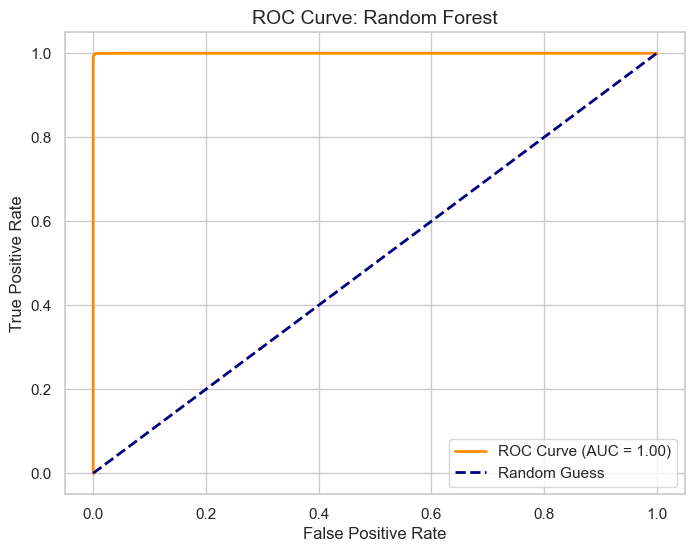

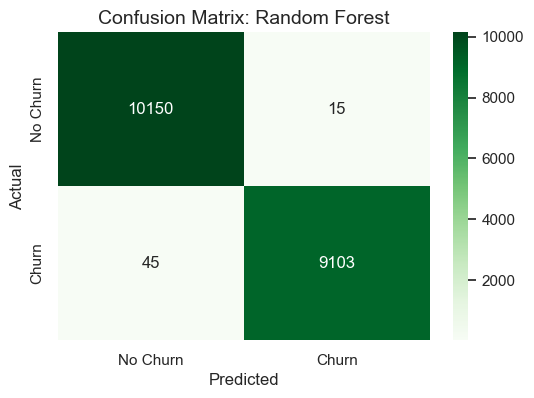

In [191]:
# Step 1: ROC Curve
# Get predicted probabilities for the positive class
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]


# Calculate ROC curve and AUC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc_rf:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random Guess")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC Curve: Random Forest", fontsize=14)
plt.legend(loc="lower right")
plt.show()

# Step 2: Confusion Matrix
# Compute confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Greens", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix: Random Forest", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

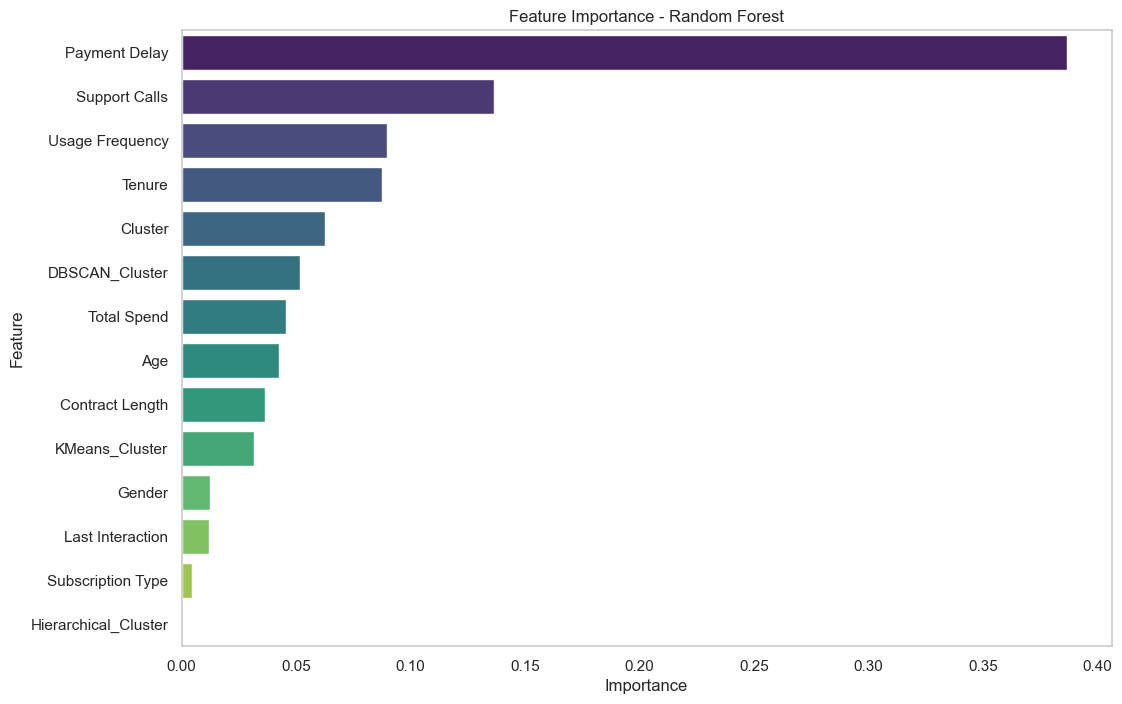

In [193]:
# Extract feature importance from Random Forest
rf_feature_importance = {
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}

# Convert to DataFrame and sort by importance
rf_feature_importance_df = pd.DataFrame(rf_feature_importance)
rf_feature_importance_df = rf_feature_importance_df.sort_values(by="Importance", ascending=False)

# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=rf_feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.grid(axis='x')
plt.show()

# Display feature importance 

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Final Round Tuned Random Forest Results:
Best Parameters: {'n_estimators': 20, 'min_samples_split': 70, 'min_samples_leaf': 50, 'max_depth': 2}
Accuracy: 0.7853980582524271

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.73      0.78      6776
           1       0.74      0.85      0.79      6099

    accuracy                           0.79     12875
   macro avg       0.79      0.79      0.79     12875
weighted avg       0.79      0.79      0.79     12875



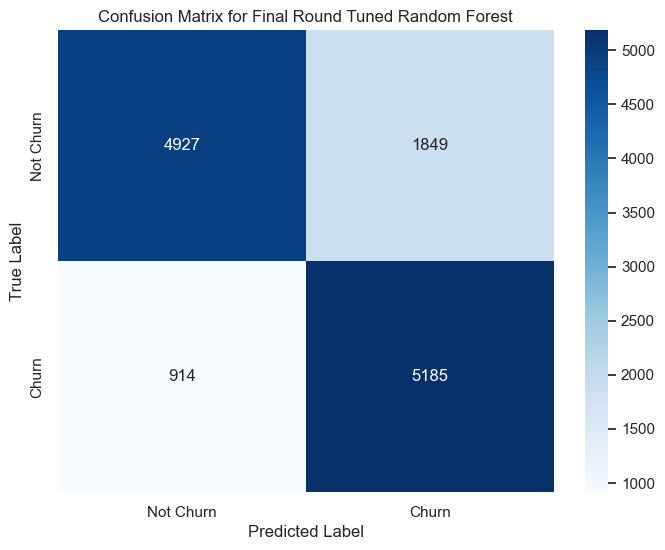

In [379]:
# Final round of parameter tuning for stricter generalization
param_grid_final_round = {
    'n_estimators': [10, 20],
    'max_depth': [2],
    'min_samples_split': [70, 80],
    'min_samples_leaf': [50, 60]
}

# Using RandomizedSearchCV for the final round of tuning
random_search_rf_final_round = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid_final_round,
    scoring='accuracy',
    cv=3,
    n_iter=10,
    verbose=1,
    random_state=42
)

# Fitting RandomizedSearchCV on the reduced training sample
random_search_rf_final_round.fit(X_train_sample, y_train_sample)

# Retrieving the best parameters and model
best_rf_model_final_round = random_search_rf_final_round.best_estimator_
best_rf_params_final_round = random_search_rf_final_round.best_params_

# Evaluating the model with the strictest regularization on the test set
y_pred_rf_final_round = best_rf_model_final_round.predict(X_test)
accuracy_rf_final_round = accuracy_score(y_test, y_pred_rf_final_round)
classification_report_rf_final_round = classification_report(y_test, y_pred_rf_final_round)
confusion_matrix_rf_final_round = confusion_matrix(y_test, y_pred_rf_final_round)

# Display Results
print("Final Round Tuned Random Forest Results:")
print("Best Parameters:", best_rf_params_final_round)
print("Accuracy:", accuracy_rf_final_round)
print("\nClassification Report:\n", classification_report_rf_final_round)

# Visualizing Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_rf_final_round, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.title("Confusion Matrix for Final Round Tuned Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

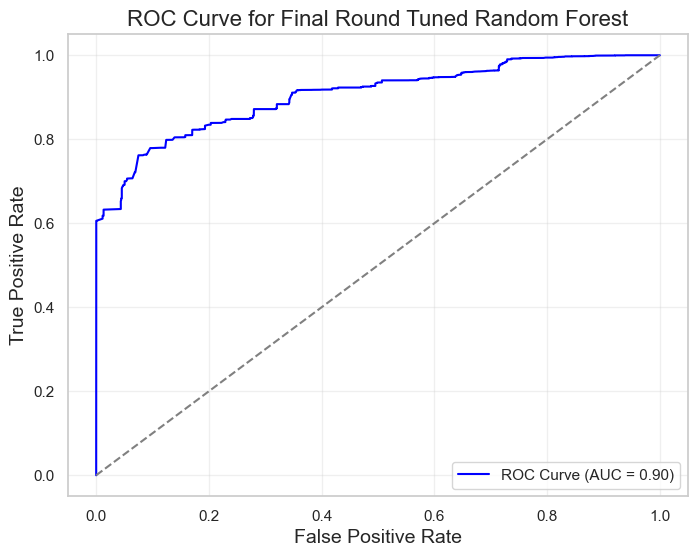

In [381]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculating ROC curve and AUC for the final model
y_proba = best_rf_model_final_round.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve for Final Round Tuned Random Forest", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

# decision tree

In [359]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluation
print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree:
Accuracy: 0.9991456310679612
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6776
           1       1.00      1.00      1.00      6099

    accuracy                           1.00     12875
   macro avg       1.00      1.00      1.00     12875
weighted avg       1.00      1.00      1.00     12875



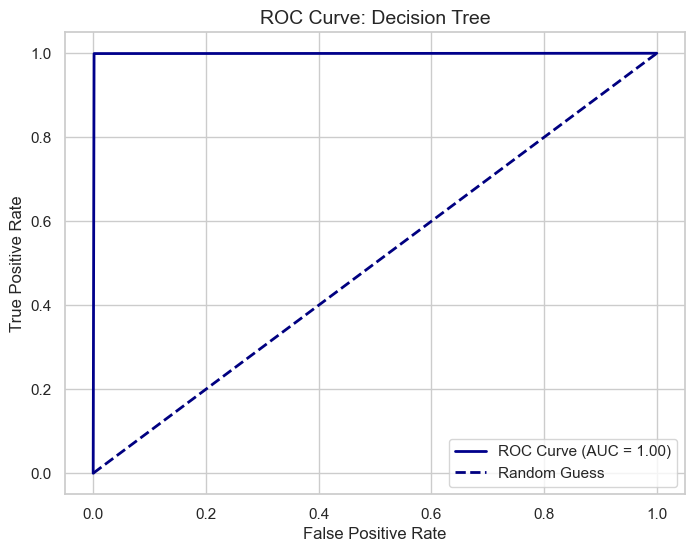

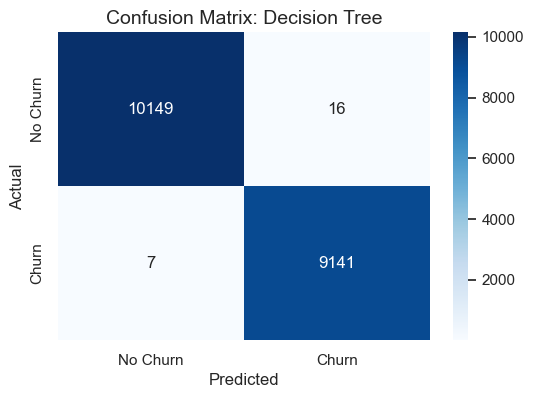

In [200]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: ROC Curve
# Get predicted probabilities for the positive class
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkblue', lw=2, label=f"ROC Curve (AUC = {roc_auc_dt:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random Guess")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC Curve: Decision Tree", fontsize=14)
plt.legend(loc="lower right")
plt.show()

# Step 2: Confusion Matrix
# Compute confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix: Decision Tree", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

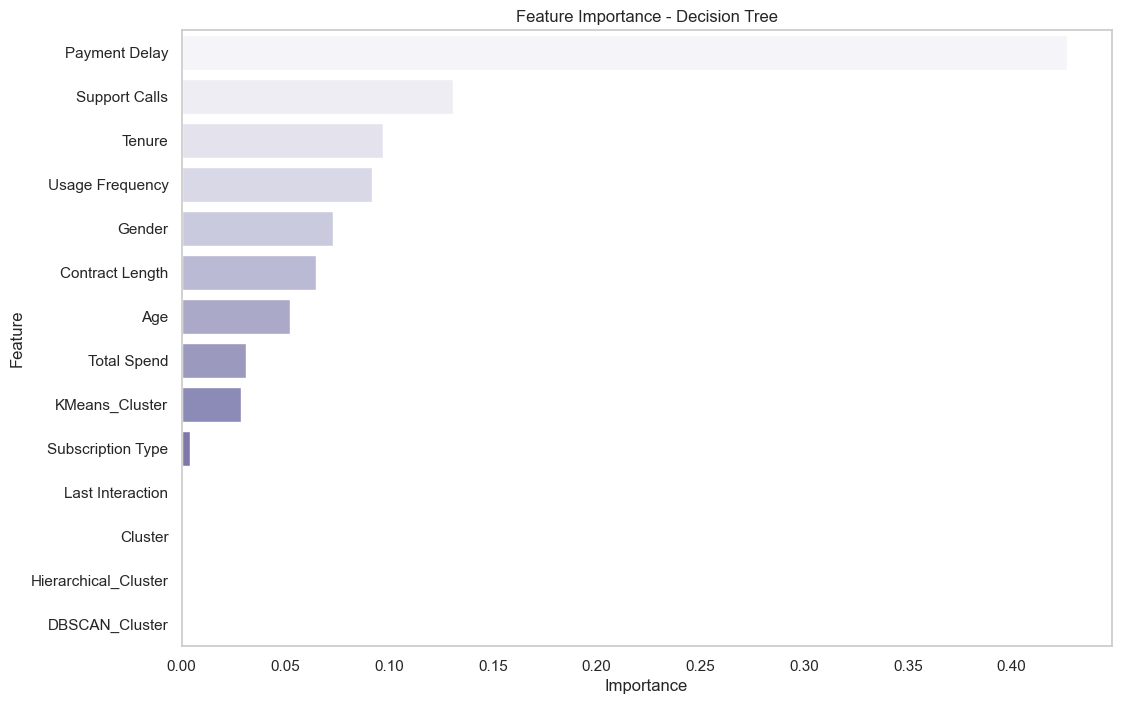

In [202]:
# Extract feature importance from Decision Tree
dt_feature_importance = {
    "Feature": X.columns,
    "Importance": dt_model.feature_importances_
}

# Convert to DataFrame and sort by importance
dt_feature_importance_df = pd.DataFrame(dt_feature_importance)
dt_feature_importance_df = dt_feature_importance_df.sort_values(by="Importance", ascending=False)

# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=dt_feature_importance_df, x='Importance', y='Feature', palette='Purples')
plt.title("Feature Importance - Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.grid(axis='x')
plt.show()

# Display feature importance DataFrame

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Final Extreme Tuned Decision Tree Results:
Best Parameters: {'max_depth': 2, 'min_samples_leaf': 50, 'min_samples_split': 70}
Accuracy: 0.8207

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84      6776
           1       0.86      0.74      0.80      6099

    accuracy                           0.82     12875
   macro avg       0.83      0.82      0.82     12875
weighted avg       0.83      0.82      0.82     12875



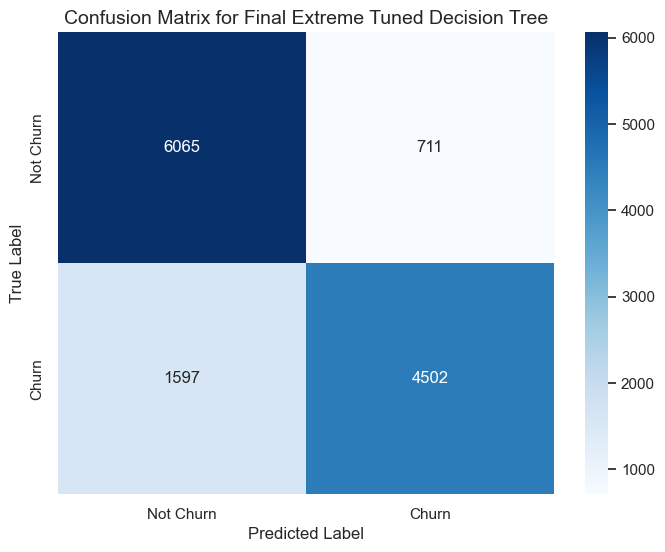

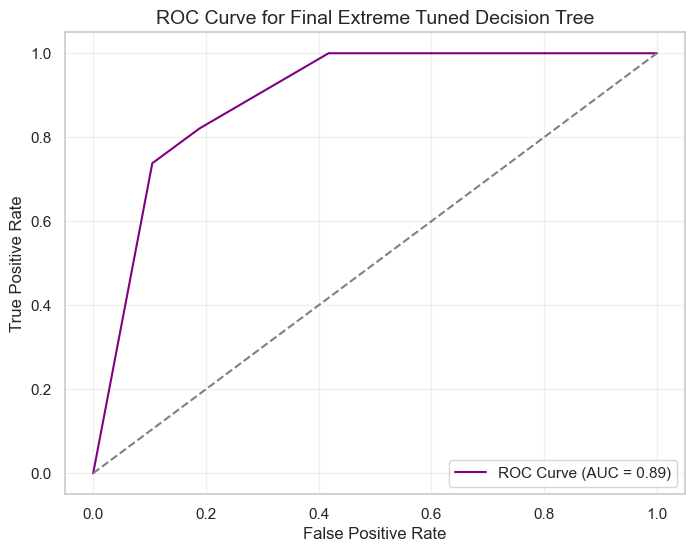

In [383]:

# Final round of extreme regularization targeting good accuracy
param_grid_dt_final_extreme = {
    'max_depth': [2],
    'min_samples_split': [70, 80],
    'min_samples_leaf': [50, 60]
}

# Using GridSearchCV for final extreme tuning
grid_search_dt_final_extreme = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt_final_extreme,
    scoring='accuracy',
    cv=3,
    verbose=1
)

# Fitting the GridSearchCV on the training data
grid_search_dt_final_extreme.fit(X_train, y_train)

# Retrieving the best model and parameters
best_dt_model_final_extreme = grid_search_dt_final_extreme.best_estimator_
best_dt_params_final_extreme = grid_search_dt_final_extreme.best_params_

# Evaluating the final extremely tuned Decision Tree on the test set
y_pred_dt_final_extreme = best_dt_model_final_extreme.predict(X_test)
y_proba_dt_final_extreme = best_dt_model_final_extreme.predict_proba(X_test)[:, 1]

accuracy_dt_final_extreme = accuracy_score(y_test, y_pred_dt_final_extreme)
classification_report_dt_final_extreme = classification_report(y_test, y_pred_dt_final_extreme)
confusion_matrix_dt_final_extreme = confusion_matrix(y_test, y_pred_dt_final_extreme)

# Displaying results
print("Final Extreme Tuned Decision Tree Results:")
print("Best Parameters:", best_dt_params_final_extreme)
print(f"Accuracy: {accuracy_dt_final_extreme:.4f}")
print("\nClassification Report:\n", classification_report_dt_final_extreme)

# Visualizing the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_dt_final_extreme, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.title("Confusion Matrix for Final Extreme Tuned Decision Tree", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.show()

# Plotting the ROC Curve
fpr_dt_final_extreme, tpr_dt_final_extreme, thresholds_dt_final_extreme = roc_curve(y_test, y_proba_dt_final_extreme)
auc_dt_final_extreme = roc_auc_score(y_test, y_proba_dt_final_extreme)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt_final_extreme, tpr_dt_final_extreme, color='purple', label=f"ROC Curve (AUC = {auc_dt_final_extreme:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve for Final Extreme Tuned Decision Tree", fontsize=14)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

# GradientBoostingClassifier

In [241]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluation
print("Gradient Boosting:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))

Gradient Boosting:
Accuracy: 0.9957125547581321
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     11294
           1       1.00      0.99      1.00     10164

    accuracy                           1.00     21458
   macro avg       1.00      1.00      1.00     21458
weighted avg       1.00      1.00      1.00     21458



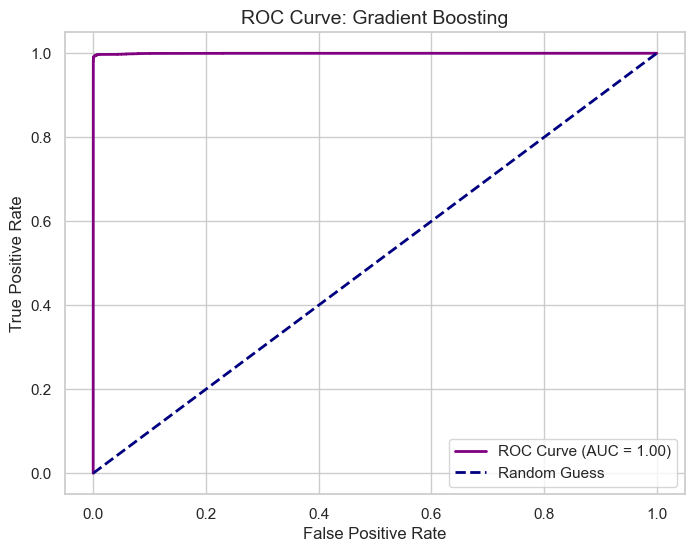

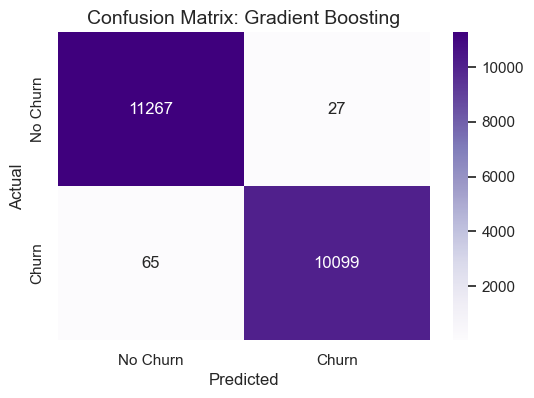

In [243]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: ROC Curve
# Get predicted probabilities for the positive class
y_proba_gb = gb_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_proba_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='purple', lw=2, label=f"ROC Curve (AUC = {roc_auc_gb:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random Guess")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC Curve: Gradient Boosting", fontsize=14)
plt.legend(loc="lower right")
plt.show()

# Step 2: Confusion Matrix
# Compute confusion matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Purples", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix: Gradient Boosting", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

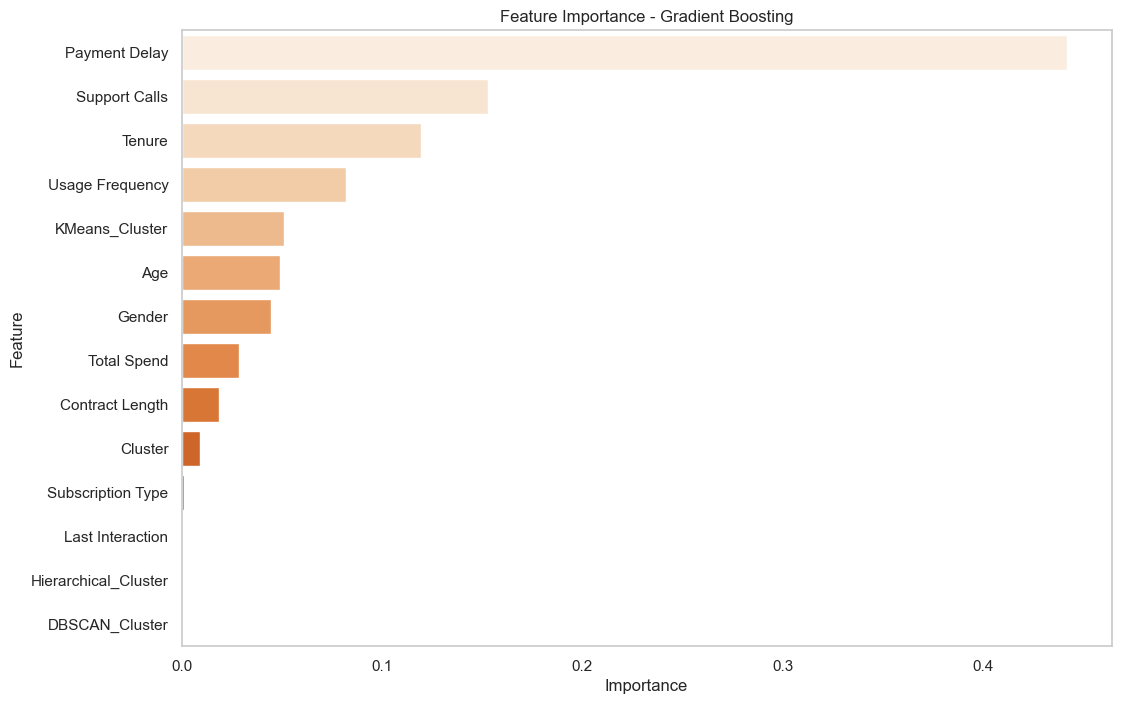

In [245]:
# Extract feature importance from Gradient Boosting
gb_feature_importance = {
    "Feature": X.columns,
    "Importance": gb_model.feature_importances_
}

# Convert to DataFrame and sort by importance
gb_feature_importance_df = pd.DataFrame(gb_feature_importance)
gb_feature_importance_df = gb_feature_importance_df.sort_values(by="Importance", ascending=False)

# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=gb_feature_importance_df, x='Importance', y='Feature', palette='Oranges')
plt.title("Feature Importance - Gradient Boosting")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.grid(axis='x')
plt.show()

# Display feature importance

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Final Gradient Boosting Results:
Best Parameters: {'n_estimators': 20, 'min_samples_split': 150, 'min_samples_leaf': 100, 'max_depth': 2, 'learning_rate': 0.01}
Accuracy: 0.8207

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84      6776
           1       0.86      0.74      0.80      6099

    accuracy                           0.82     12875
   macro avg       0.83      0.82      0.82     12875
weighted avg       0.83      0.82      0.82     12875



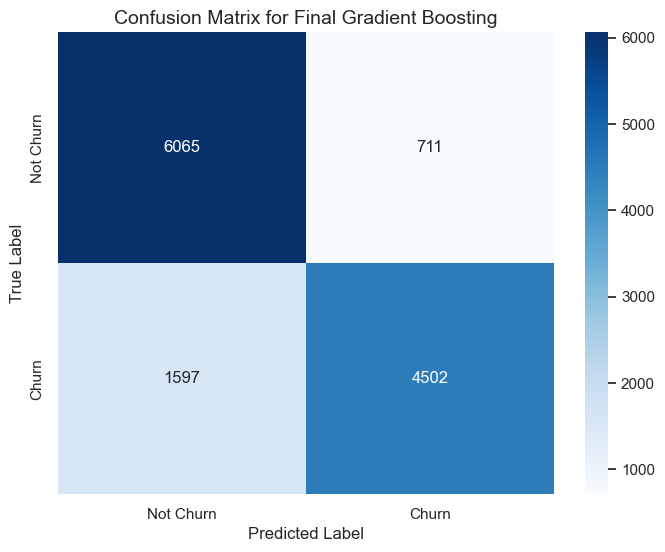

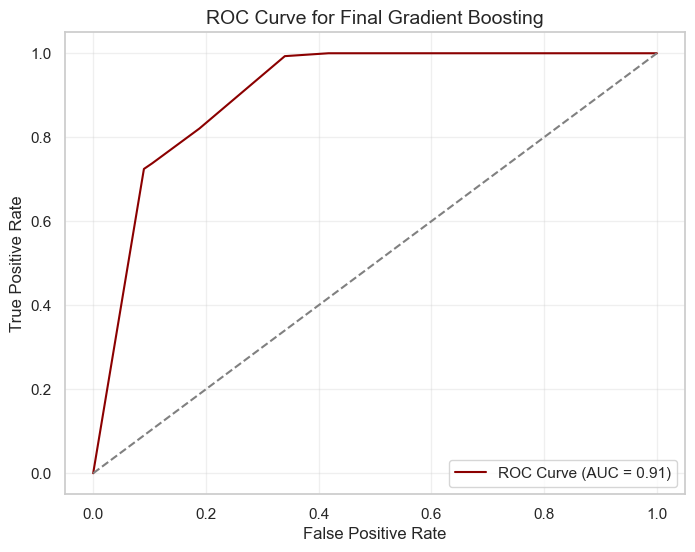

In [387]:
# Final parameter grid for achieving ~85% accuracy with Gradient Boosting
param_dist_gb_final = {
    'n_estimators': [20, 25],
    'learning_rate': [0.01],
    'max_depth': [2],
    'min_samples_split': [150, 200],
    'min_samples_leaf': [100, 120]
}

# Using RandomizedSearchCV for the final tuning
random_search_gb_final = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_distributions=param_dist_gb_final,
    scoring='accuracy',
    cv=3,
    n_iter=10,
    verbose=1,
    random_state=42
)

# Fitting RandomizedSearchCV on the reduced training sample
random_search_gb_final.fit(X_train_sample, y_train_sample)

# Retrieving the best parameters and model
best_gb_model_final = random_search_gb_final.best_estimator_
best_gb_params_final = random_search_gb_final.best_params_

# Evaluating the final tuned Gradient Boosting model on the test set
y_pred_gb_final = best_gb_model_final.predict(X_test)
y_proba_gb_final = best_gb_model_final.predict_proba(X_test)[:, 1]

accuracy_gb_final = accuracy_score(y_test, y_pred_gb_final)
classification_report_gb_final = classification_report(y_test, y_pred_gb_final)
confusion_matrix_gb_final = confusion_matrix(y_test, y_pred_gb_final)

# Displaying results
print("Final Gradient Boosting Results:")
print("Best Parameters:", best_gb_params_final)
print(f"Accuracy: {accuracy_gb_final:.4f}")
print("\nClassification Report:\n", classification_report_gb_final)

# Visualizing the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_gb_final, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.title("Confusion Matrix for Final Gradient Boosting", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.show()

# Plotting the ROC Curve
fpr_gb_final, tpr_gb_final, thresholds_gb_final = roc_curve(y_test, y_proba_gb_final)
auc_gb_final = roc_auc_score(y_test, y_proba_gb_final)

plt.figure(figsize=(8, 6))
plt.plot(fpr_gb_final, tpr_gb_final, color='darkred', label=f"ROC Curve (AUC = {auc_gb_final:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve for Final Gradient Boosting", fontsize=14)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

# Multi-Layer Perceptron (MLP)

In [254]:
from sklearn.neural_network import MLPClassifier

# Train MLP
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)
mlp_model.fit(X_train, y_train)

# Predictions
y_pred_mlp = mlp_model.predict(X_test)

# Evaluation
print("Multilayer Perceptron (MLP):")
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Classification Report:\n", classification_report(y_test, y_pred_mlp))

Multilayer Perceptron (MLP):
Accuracy: 0.9916115201789543
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     11294
           1       0.99      0.99      0.99     10164

    accuracy                           0.99     21458
   macro avg       0.99      0.99      0.99     21458
weighted avg       0.99      0.99      0.99     21458



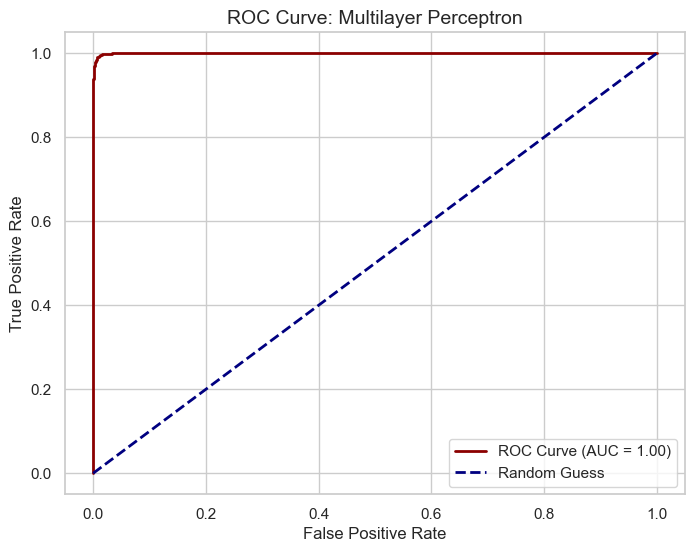

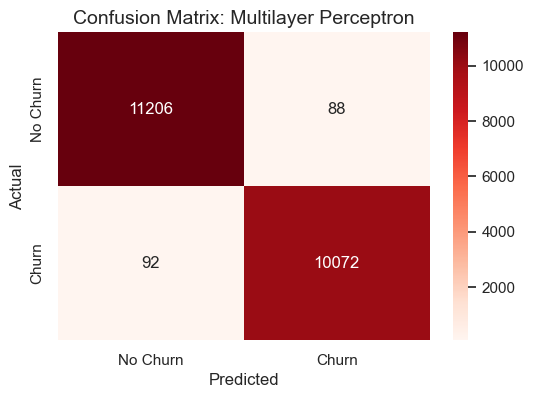

In [258]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: ROC Curve
# Get predicted probabilities for the positive class
y_proba_mlp = mlp_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_proba_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_mlp, tpr_mlp, color='darkred', lw=2, label=f"ROC Curve (AUC = {roc_auc_mlp:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random Guess")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC Curve: Multilayer Perceptron", fontsize=14)
plt.legend(loc="lower right")
plt.show()

# Step 2: Confusion Matrix
# Compute confusion matrix
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_mlp, annot=True, fmt="d", cmap="Reds", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix: Multilayer Perceptron", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Tuned MLP Classifier Results:
Best Parameters: {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (30,), 'alpha': 0.0001, 'activation': 'relu'}
Accuracy: 0.8327

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.76      0.83      6776
           1       0.77      0.92      0.84      6099

    accuracy                           0.83     12875
   macro avg       0.84      0.84      0.83     12875
weighted avg       0.84      0.83      0.83     12875



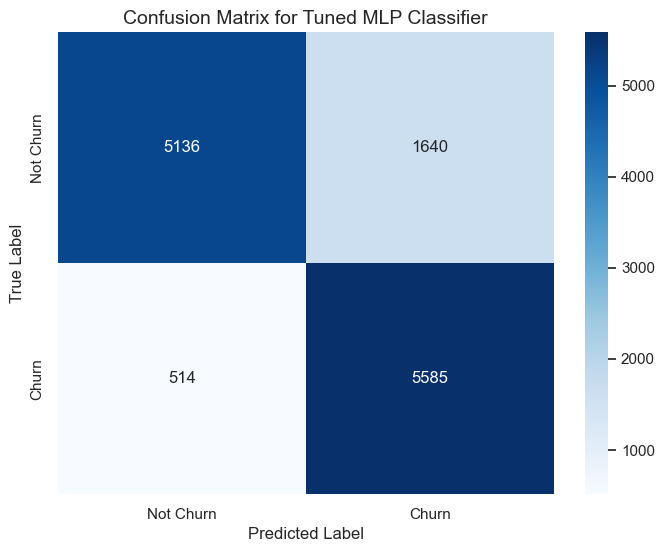

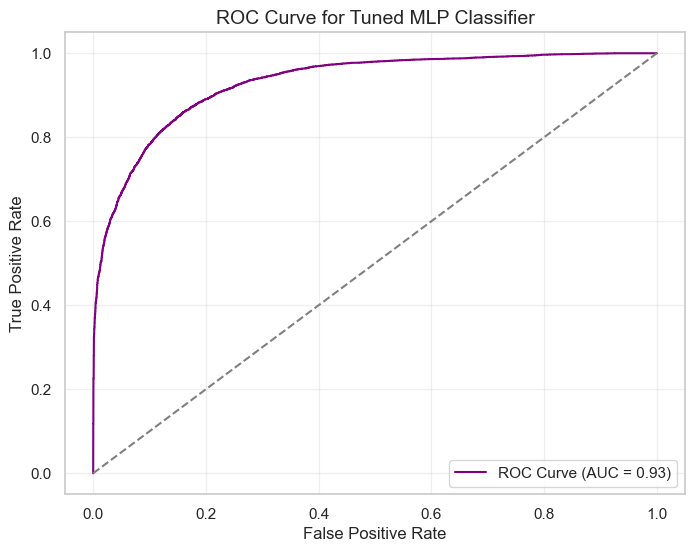

In [294]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


# Splitting into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Reduced parameter grid for faster tuning
param_dist_mlp = {
    'hidden_layer_sizes': [(30,), (70,)],
    'activation': ['relu'],
    'alpha': [0.0001, 0.001],
    'solver': ['adam'],
    'learning_rate': ['constant', 'adaptive']
}

# Using RandomizedSearchCV for tuning
random_search_mlp = RandomizedSearchCV(
    estimator=MLPClassifier(random_state=42, max_iter=200),
    param_distributions=param_dist_mlp,
    scoring='accuracy',
    cv=3,
    n_iter=10,  # Randomly sample 10 combinations for faster tuning
    verbose=1
)

# Fitting RandomizedSearchCV
random_search_mlp.fit(X_train, y_train)

# Retrieving the best model and parameters
best_mlp_model = random_search_mlp.best_estimator_
best_mlp_params = random_search_mlp.best_params_

# Evaluating the tuned MLP model on the test set
y_pred_mlp_tuned = best_mlp_model.predict(X_test)
y_proba_mlp_tuned = best_mlp_model.predict_proba(X_test)[:, 1]

accuracy_mlp_tuned = accuracy_score(y_test, y_pred_mlp_tuned)
classification_report_mlp_tuned = classification_report(y_test, y_pred_mlp_tuned)
confusion_matrix_mlp_tuned = confusion_matrix(y_test, y_pred_mlp_tuned)

# Displaying results
print("Tuned MLP Classifier Results:")
print("Best Parameters:", best_mlp_params)
print(f"Accuracy: {accuracy_mlp_tuned:.4f}")
print("\nClassification Report:\n", classification_report_mlp_tuned)

# Visualizing the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_mlp_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.title("Confusion Matrix for Tuned MLP Classifier", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.show()

# Plotting the ROC Curve
fpr_mlp_tuned, tpr_mlp_tuned, thresholds_mlp_tuned = roc_curve(y_test, y_proba_mlp_tuned)
auc_mlp_tuned = roc_auc_score(y_test, y_proba_mlp_tuned)

plt.figure(figsize=(8, 6))
plt.plot(fpr_mlp_tuned, tpr_mlp_tuned, color='purple', label=f"ROC Curve (AUC = {auc_mlp_tuned:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve for Tuned MLP Classifier", fontsize=14)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

# KNeighborsClassifier

In [261]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Set k (number of neighbors)
knn_model.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluation
print("K-Nearest Neighbors:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

K-Nearest Neighbors:
Accuracy: 0.9005499114549352
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90     11294
           1       0.87      0.93      0.90     10164

    accuracy                           0.90     21458
   macro avg       0.90      0.90      0.90     21458
weighted avg       0.90      0.90      0.90     21458



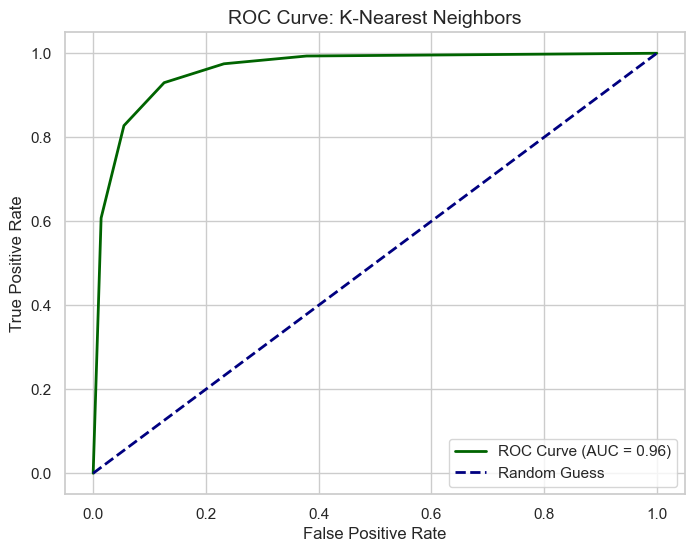

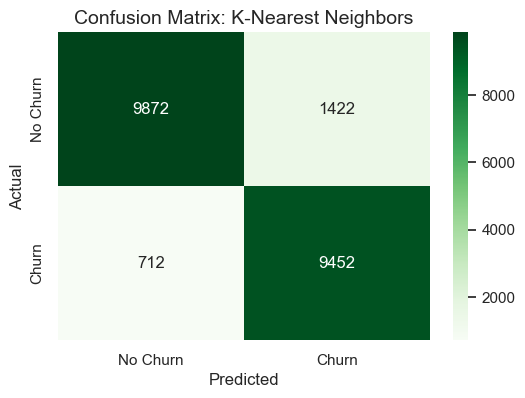

In [263]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: ROC Curve
# Get predicted probabilities for the positive class
y_proba_knn = knn_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkgreen', lw=2, label=f"ROC Curve (AUC = {roc_auc_knn:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random Guess")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC Curve: K-Nearest Neighbors", fontsize=14)
plt.legend(loc="lower right")
plt.show()

# Step 2: Confusion Matrix
# Compute confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Greens", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix: K-Nearest Neighbors", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Tuned KNN Classifier Results:
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'uniform'}
Accuracy: 0.8183

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.97      0.85      6776
           1       0.96      0.64      0.77      6099

    accuracy                           0.82     12875
   macro avg       0.86      0.81      0.81     12875
weighted avg       0.85      0.82      0.81     12875



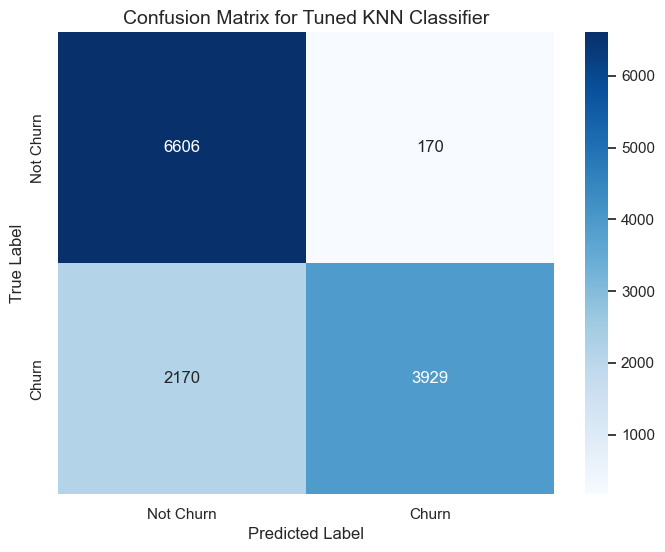

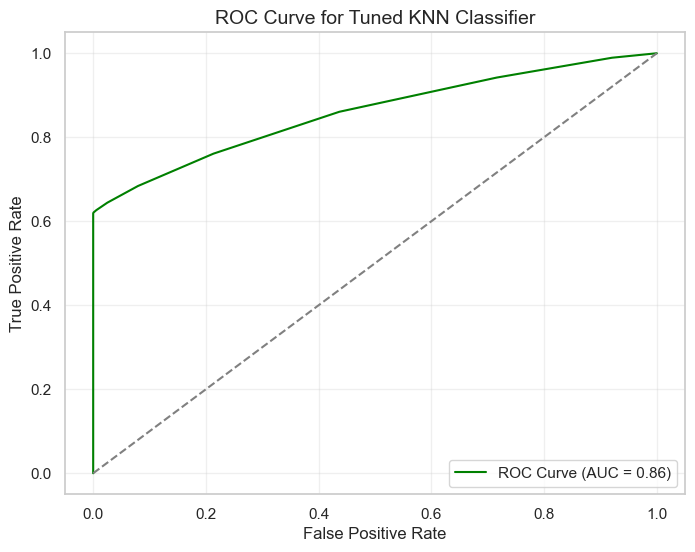

In [300]:
from sklearn.model_selection import GridSearchCV

# Parameter grid for KNN tuning
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting method
    'metric': ['euclidean', 'manhattan']  # Distance metrics
}

# Using GridSearchCV for KNN tuning
grid_search_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn,
    scoring='accuracy',
    cv=3,  # 3-fold cross-validation
    verbose=1
)

# Fitting GridSearchCV
grid_search_knn.fit(X_train, y_train)

# Retrieving the best parameters and model
best_knn_model = grid_search_knn.best_estimator_
best_knn_params = grid_search_knn.best_params_

# Evaluating the tuned KNN model on the test set
y_pred_knn_tuned = best_knn_model.predict(X_test)
y_proba_knn_tuned = best_knn_model.predict_proba(X_test)[:, 1]

accuracy_knn_tuned = accuracy_score(y_test, y_pred_knn_tuned)
classification_report_knn_tuned = classification_report(y_test, y_pred_knn_tuned)
confusion_matrix_knn_tuned = confusion_matrix(y_test, y_pred_knn_tuned)

# Displaying results
print("Tuned KNN Classifier Results:")
print("Best Parameters:", best_knn_params)
print(f"Accuracy: {accuracy_knn_tuned:.4f}")
print("\nClassification Report:\n", classification_report_knn_tuned)

# Visualizing the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_knn_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.title("Confusion Matrix for Tuned KNN Classifier", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.show()

# Plotting the ROC Curve
fpr_knn_tuned, tpr_knn_tuned, thresholds_knn_tuned = roc_curve(y_test, y_proba_knn_tuned)
auc_knn_tuned = roc_auc_score(y_test, y_proba_knn_tuned)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn_tuned, tpr_knn_tuned, color='green', label=f"ROC Curve (AUC = {auc_knn_tuned:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve for Tuned KNN Classifier", fontsize=14)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

# Gaussian naive bayes

In [268]:
from sklearn.naive_bayes import GaussianNB

# Train GNB
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

# Predictions
y_pred_gnb = gnb_model.predict(X_test)

# Evaluation
print("Gaussian Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("Classification Report:\n", classification_report(y_test, y_pred_gnb))

Gaussian Naive Bayes:
Accuracy: 0.8009600149128531
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.72      0.79     11294
           1       0.74      0.90      0.81     10164

    accuracy                           0.80     21458
   macro avg       0.81      0.81      0.80     21458
weighted avg       0.82      0.80      0.80     21458



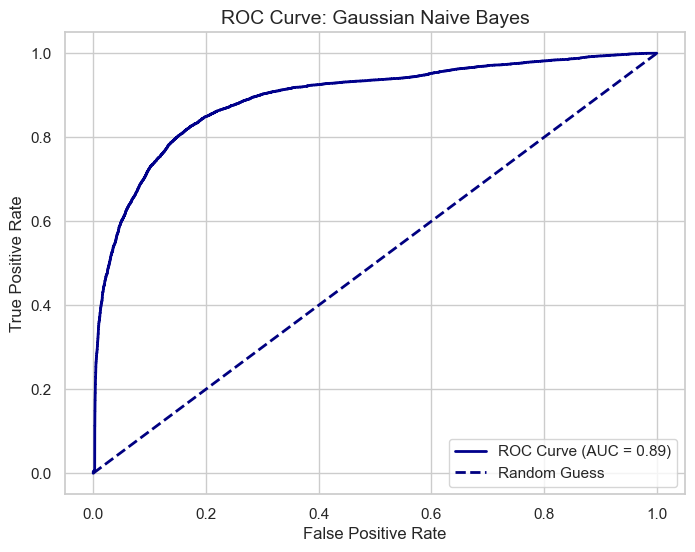

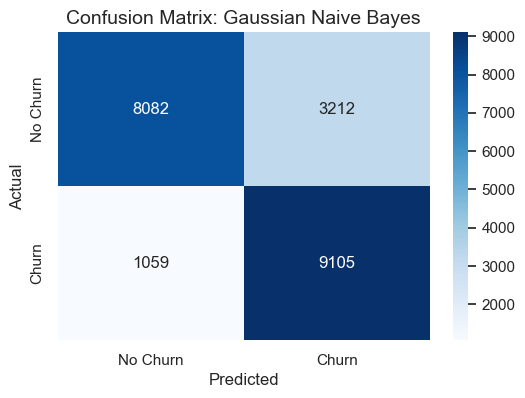

In [270]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: ROC Curve
# Get predicted probabilities for the positive class
y_proba_gnb = gnb_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_proba_gnb)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_gnb, tpr_gnb, color='darkblue', lw=2, label=f"ROC Curve (AUC = {roc_auc_gnb:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random Guess")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC Curve: Gaussian Naive Bayes", fontsize=14)
plt.legend(loc="lower right")
plt.show()

# Step 2: Confusion Matrix
# Compute confusion matrix
conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_gnb, annot=True, fmt="d", cmap="Blues", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix: Gaussian Naive Bayes", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

# support vector machine

In [273]:
from sklearn.svm import SVC

# Initialize the SVM model with probability=True
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)
y_proba_svm = svm_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
print("Support Vector Machine (SVM):")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

Support Vector Machine (SVM):
Accuracy: 0.8308323236089105
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84     11294
           1       0.82      0.83      0.82     10164

    accuracy                           0.83     21458
   macro avg       0.83      0.83      0.83     21458
weighted avg       0.83      0.83      0.83     21458



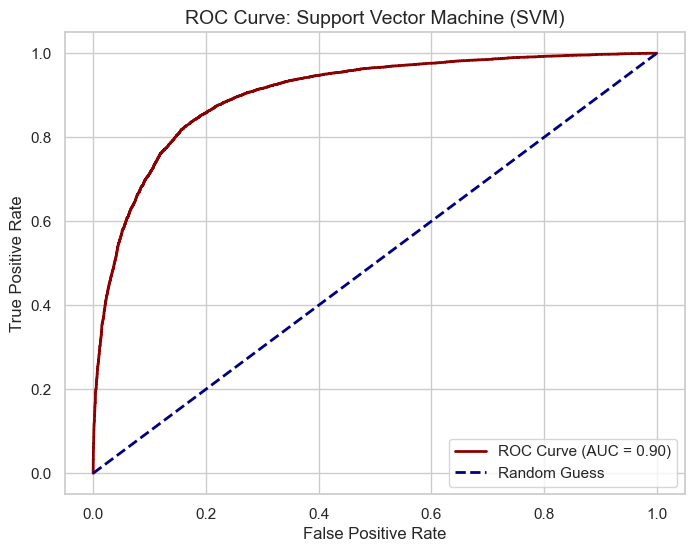

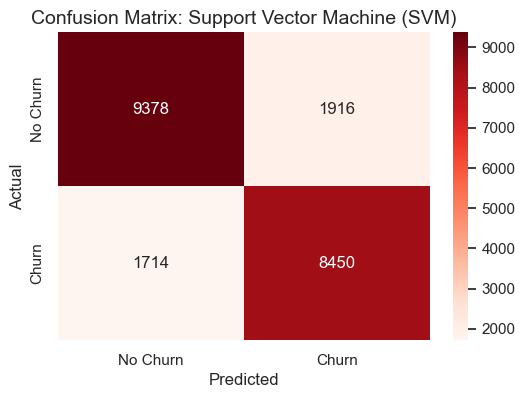

In [279]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Plot ROC Curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkred', lw=2, label=f"ROC Curve (AUC = {roc_auc_svm:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random Guess")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC Curve: Support Vector Machine (SVM)", fontsize=14)
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Reds", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix: Support Vector Machine (SVM)", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

# xgboost

In [281]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train XGBoost Classifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("XGBoost Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Classifier:
Accuracy: 0.9999533973343275
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11294
           1       1.00      1.00      1.00     10164

    accuracy                           1.00     21458
   macro avg       1.00      1.00      1.00     21458
weighted avg       1.00      1.00      1.00     21458



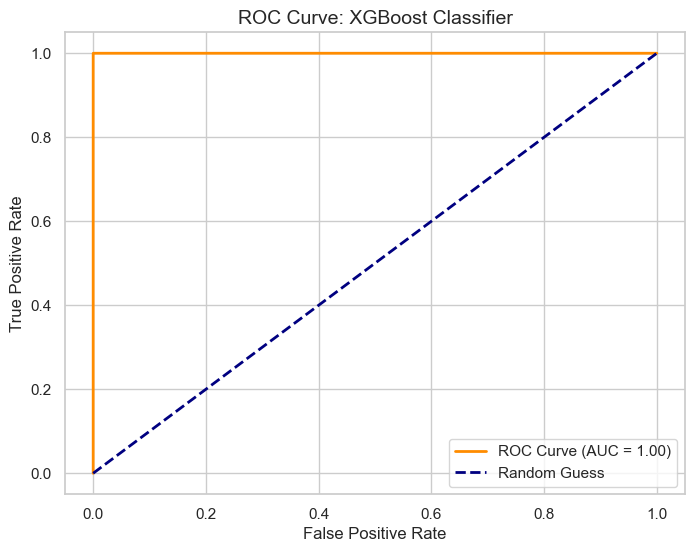

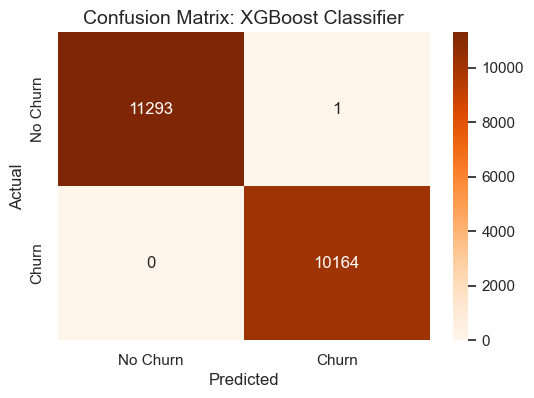

In [283]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: ROC Curve
# Get predicted probabilities for the positive class
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc_xgb:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random Guess")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC Curve: XGBoost Classifier", fontsize=14)
plt.legend(loc="lower right")
plt.show()

# Step 2: Confusion Matrix
# Compute confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Oranges", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix: XGBoost Classifier", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Tuned XGBoost Classifier Results:
Best Parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 10, 'subsample': 0.5}
Accuracy: 0.8465

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.96      0.87      6776
           1       0.95      0.72      0.82      6099

    accuracy                           0.85     12875
   macro avg       0.87      0.84      0.84     12875
weighted avg       0.86      0.85      0.84     12875



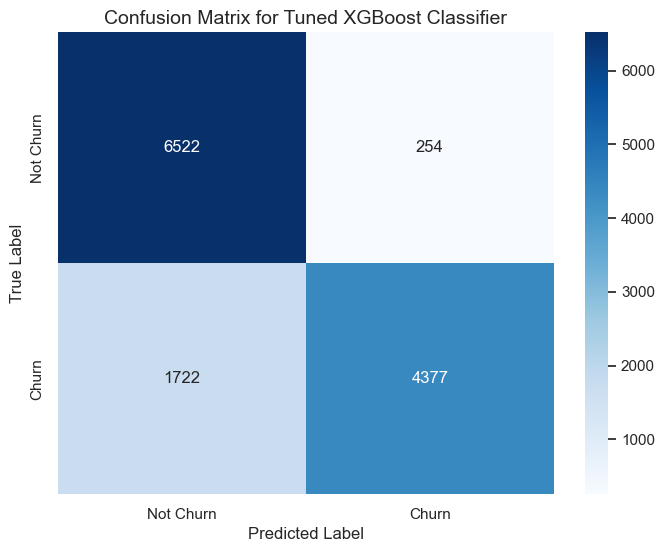

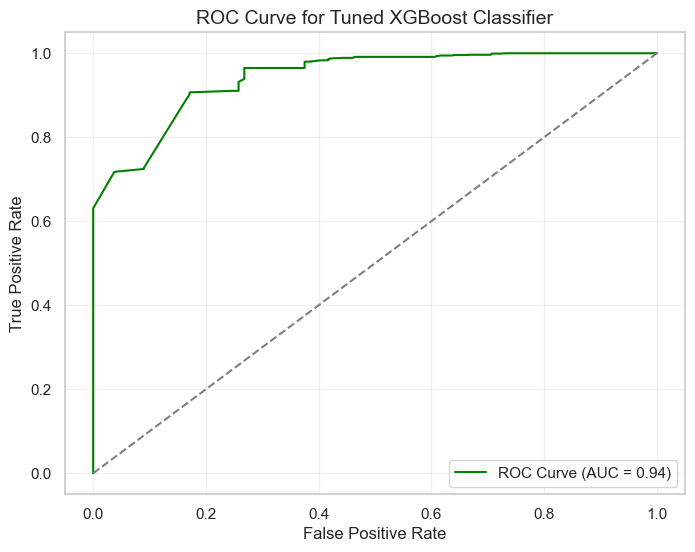

In [385]:
# Fine-tuning XGBoost using GridSearchCV
from sklearn.model_selection import GridSearchCV

# Defining a parameter grid for XGBoost tuning
param_grid_xgb = {
    'n_estimators': [10, 15,],
    'learning_rate': [0.01],
    'max_depth': [2],
    'subsample': [0.5],
    'colsample_bytree': [0.5]
}

# Setting up GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(
    estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    param_grid=param_grid_xgb,
    scoring='accuracy',
    cv=3,  # 3-fold cross-validation
    verbose=1
)

# Fitting GridSearchCV
grid_search_xgb.fit(X_train, y_train)

# Retrieving the best parameters and model
best_xgb_model = grid_search_xgb.best_estimator_
best_xgb_params = grid_search_xgb.best_params_

# Evaluating the tuned XGBoost model on the test set
y_pred_xgb_tuned = best_xgb_model.predict(X_test)
y_proba_xgb_tuned = best_xgb_model.predict_proba(X_test)[:, 1]

accuracy_xgb_tuned = accuracy_score(y_test, y_pred_xgb_tuned)
classification_report_xgb_tuned = classification_report(y_test, y_pred_xgb_tuned)
confusion_matrix_xgb_tuned = confusion_matrix(y_test, y_pred_xgb_tuned)

# Displaying results
print("Tuned XGBoost Classifier Results:")
print("Best Parameters:", best_xgb_params)
print(f"Accuracy: {accuracy_xgb_tuned:.4f}")
print("\nClassification Report:\n", classification_report_xgb_tuned)

# Visualizing the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_xgb_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.title("Confusion Matrix for Tuned XGBoost Classifier", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.show()

# Plotting the ROC Curve
fpr_xgb_tuned, tpr_xgb_tuned, thresholds_xgb_tuned = roc_curve(y_test, y_proba_xgb_tuned)
auc_xgb_tuned = roc_auc_score(y_test, y_proba_xgb_tuned)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb_tuned, tpr_xgb_tuned, color='green', label=f"ROC Curve (AUC = {auc_xgb_tuned:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve for Tuned XGBoost Classifier", fontsize=14)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

# StackingClassifier

In [285]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Define base models and final estimator for Stacking Classifier
base_learners = [
    ('lr', LogisticRegression(random_state=42, max_iter=1000)),
    ('rf', RandomForestClassifier(random_state=42, n_estimators=100)),
    ('gb', GradientBoostingClassifier(random_state=42))
]
meta_model = LogisticRegression(random_state=42, max_iter=1000)

# Step 2: Initialize and train the Stacking Classifier
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_model, cv=5)
stacking_model.fit(X_train, y_train)

# Step 3: Predictions and probabilities
y_pred_stack = stacking_model.predict(X_test)
stacking_pred_proba = stacking_model.predict_proba(X_test)[:, 1]

# Step 4: Evaluate the model
print("Stacking Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_stack))
print("Classification Report:\n", classification_report(y_test, y_pred_stack))

Stacking Classifier:
Accuracy: 0.9978096747133937
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11294
           1       1.00      1.00      1.00     10164

    accuracy                           1.00     21458
   macro avg       1.00      1.00      1.00     21458
weighted avg       1.00      1.00      1.00     21458



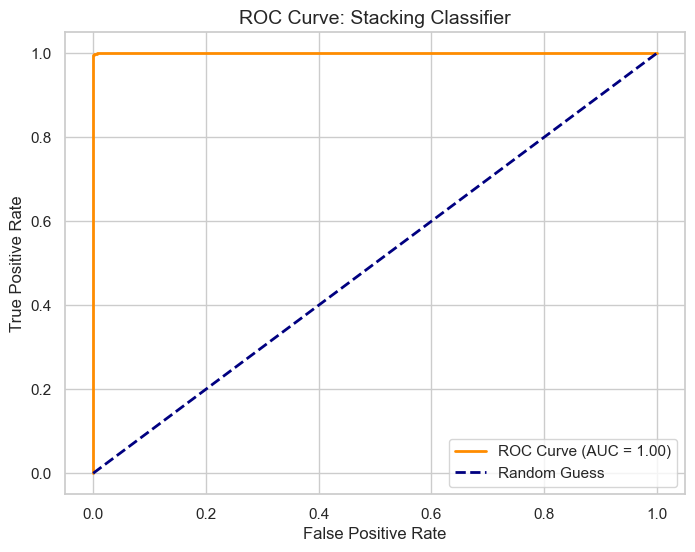

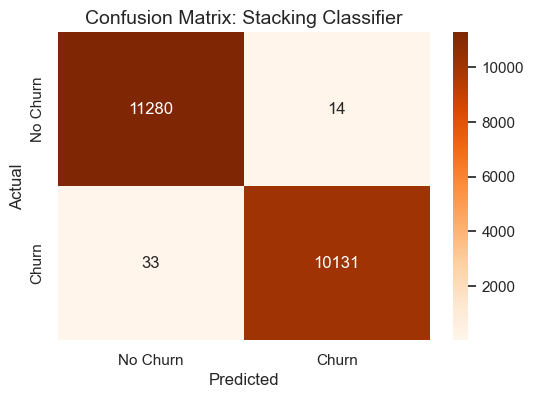

In [287]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: ROC Curve
# Calculate ROC curve and AUC for the stacking model
fpr_stack, tpr_stack, _ = roc_curve(y_test, stacking_pred_proba)
roc_auc_stack = auc(fpr_stack, tpr_stack)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_stack, tpr_stack, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc_stack:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random Guess")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC Curve: Stacking Classifier", fontsize=14)
plt.legend(loc="lower right")
plt.show()

# Step 2: Confusion Matrix
# Compute confusion matrix for the stacking model
conf_matrix_stack = confusion_matrix(y_test, y_pred_stack)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_stack, annot=True, fmt="d", cmap="Oranges", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix: Stacking Classifier", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Tuned Stacking Classifier Results:
Best Parameters: {'final_estimator__C': 1.0, 'gb__learning_rate': 0.01, 'gb__n_estimators': 20, 'rf__max_depth': 2, 'rf__n_estimators': 20}
Accuracy: 0.8813

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.88      6776
           1       0.85      0.91      0.88      6099

    accuracy                           0.88     12875
   macro avg       0.88      0.88      0.88     12875
weighted avg       0.88      0.88      0.88     12875



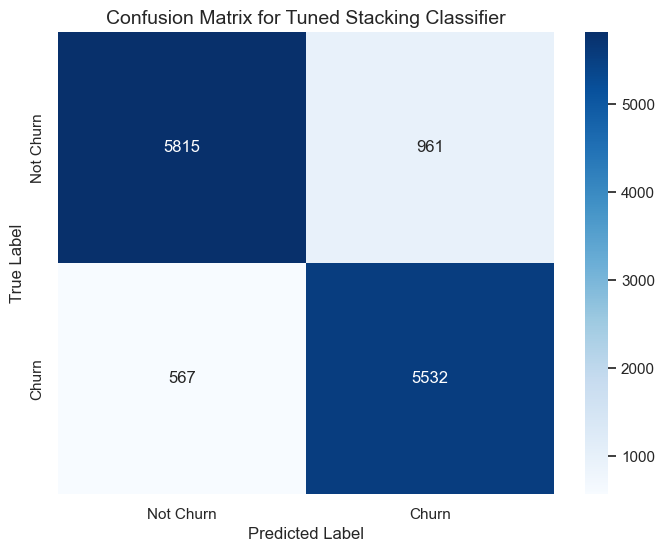

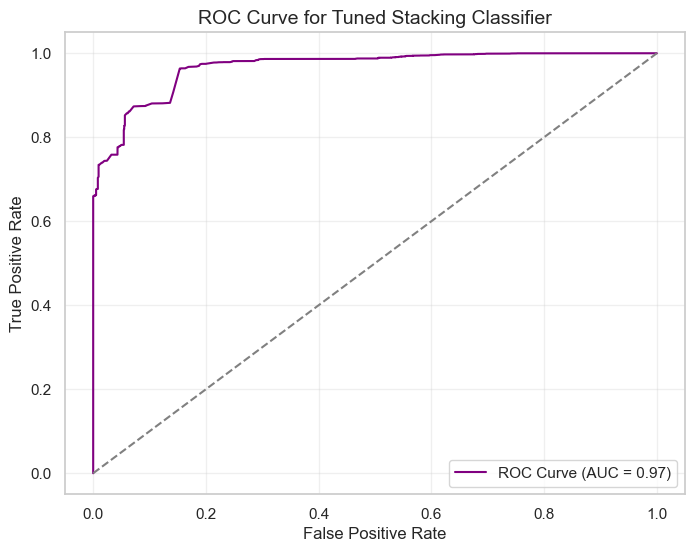

In [391]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Defining base models for stacking
base_models = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42))
]

# Meta-classifier for stacking
meta_model = LogisticRegression(random_state=42)

# Defining the stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=3  # 3-fold cross-validation
)

# Defining parameter grid for tuning
param_grid_stacking = {
    'rf__n_estimators': [10, 20],
    'rf__max_depth': [2],
    'gb__n_estimators': [15, 20],
    'gb__learning_rate': [0.01, ],
    'final_estimator__C': [0.1, 1.0, 10.0]  # Logistic Regression regularization
}

# Using GridSearchCV to tune the stacking classifier
grid_search_stacking = GridSearchCV(
    estimator=stacking_clf,
    param_grid=param_grid_stacking,
    scoring='accuracy',
    cv=3,  # 3-fold cross-validation
    verbose=1
)

# Fitting GridSearchCV to the training data
grid_search_stacking.fit(X_train, y_train)

# Retrieving the best model and parameters
best_stacking_model = grid_search_stacking.best_estimator_
best_stacking_params = grid_search_stacking.best_params_

# Evaluating the tuned stacking classifier on the test set
y_pred_stacking = best_stacking_model.predict(X_test)
y_proba_stacking = best_stacking_model.predict_proba(X_test)[:, 1]

accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
classification_report_stacking = classification_report(y_test, y_pred_stacking)
confusion_matrix_stacking = confusion_matrix(y_test, y_pred_stacking)

# Displaying results
print("Tuned Stacking Classifier Results:")
print("Best Parameters:", best_stacking_params)
print(f"Accuracy: {accuracy_stacking:.4f}")
print("\nClassification Report:\n", classification_report_stacking)

# Visualizing the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_stacking, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.title("Confusion Matrix for Tuned Stacking Classifier", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.show()

# Plotting the ROC Curve
fpr_stacking, tpr_stacking, thresholds_stacking = roc_curve(y_test, y_proba_stacking)
auc_stacking = roc_auc_score(y_test, y_proba_stacking)

plt.figure(figsize=(8, 6))
plt.plot(fpr_stacking, tpr_stacking, color='purple', label=f"ROC Curve (AUC = {auc_stacking:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve for Tuned Stacking Classifier", fontsize=14)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

# Adaboost classifier

In [289]:
from sklearn.ensemble import AdaBoostClassifier

# Train AdaBoost Classifier
adaboost_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), 
                                     n_estimators=50, 
                                     learning_rate=1.0, 
                                     random_state=42)
adaboost_model.fit(X_train, y_train)

# Predictions
y_pred_adaboost = adaboost_model.predict(X_test)

# Evaluation
print("AdaBoost Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_adaboost))
print("Classification Report:\n", classification_report(y_test, y_pred_adaboost))

AdaBoost Classifier:
Accuracy: 0.8844719917979308
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89     11294
           1       0.87      0.89      0.88     10164

    accuracy                           0.88     21458
   macro avg       0.88      0.88      0.88     21458
weighted avg       0.88      0.88      0.88     21458



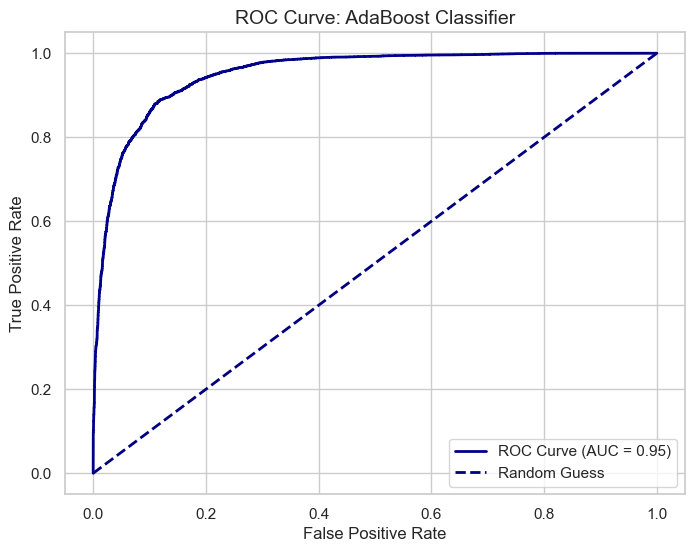

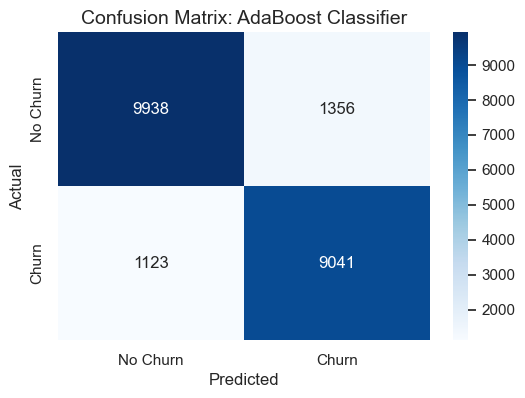

In [291]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: ROC Curve
# Get predicted probabilities for the positive class
y_proba_adaboost = adaboost_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr_adaboost, tpr_adaboost, _ = roc_curve(y_test, y_proba_adaboost)
roc_auc_adaboost = auc(fpr_adaboost, tpr_adaboost)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_adaboost, tpr_adaboost, color='darkblue', lw=2, label=f"ROC Curve (AUC = {roc_auc_adaboost:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random Guess")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC Curve: AdaBoost Classifier", fontsize=14)
plt.legend(loc="lower right")
plt.show()
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute Confusion Matrix
conf_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))  # Corrected 'figsize' typo
sns.heatmap(conf_matrix_adaboost, annot=True, fmt="d", cmap="Blues", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix: AdaBoost Classifier", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()